In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
df=pd.read_csv(r"C:\Users\vamsi\Downloads\data.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0                 1          2              1               1   
1                 8          1              1               2   
2                 2          2              1               4   
3                 3          4              1               5   
4                 2          1              1               7   

   EnvironmentSatisfaction  ... OverTime  PercentSalaryHike  \
0                        2  ...      Yes                 11   
1                        3  ...       No                 23   
2                        4  ...      Yes                 15   
3                        4  ...      Yes                 11   
4                        1  ...       No                 12   

   PerformanceRating  RelationshipSatisfaction StockOptionLevel  \
0                  3                         1                0   
1                  4                         4                1   
2                  3                         2                0   
3                  3                         3                0   
4                  3                         4                1   

   TotalWorkingYears WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  8               1               6                   4   
1                 10               3              10                   7   
2                  7               3               0                   0   
3                  8               3               8                   7   
4                  6               3               2                   2   

  YearsWithCurrManager  
0                    5  
1                    7  
2                    0  
3                    0  
4                    2  

[5 rows x 29 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [4]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsWithCurrManager          18
dtype: int64

- There are 1470 rows and 31 columns in the dataset and there are no missing values in the dataset.

- We have 20 columns with numerical values and 9 columns with categorical values.

- There are some columns that we can drop because they are not relevant for our analysis or they have no variance like EmployeeCount, EmployeeNumber

In [5]:
df.drop(['EmployeeCount', 'EmployeeNumber'], axis="columns", inplace=True)

## Univariate Analysis

In [6]:
Num_var=['Age','DistanceFromHome','HourlyRate','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
         'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
Cat_var=['BusinessTravel','Department','Education','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction',
         'MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

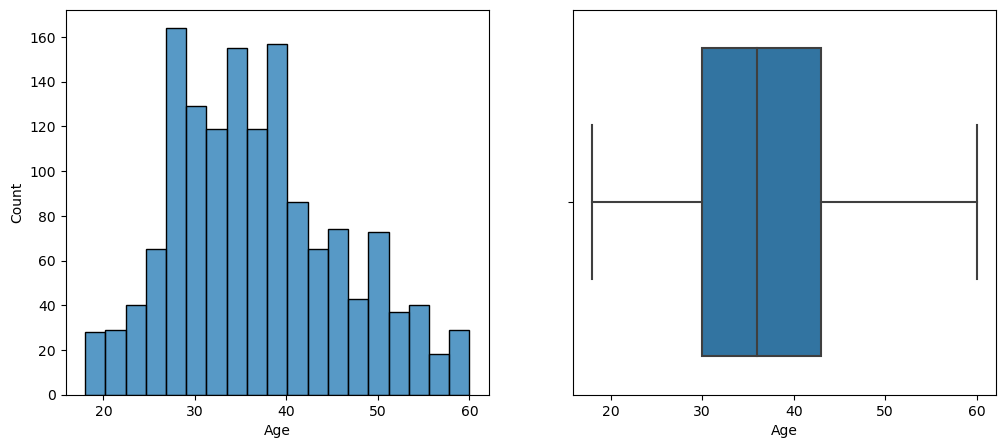

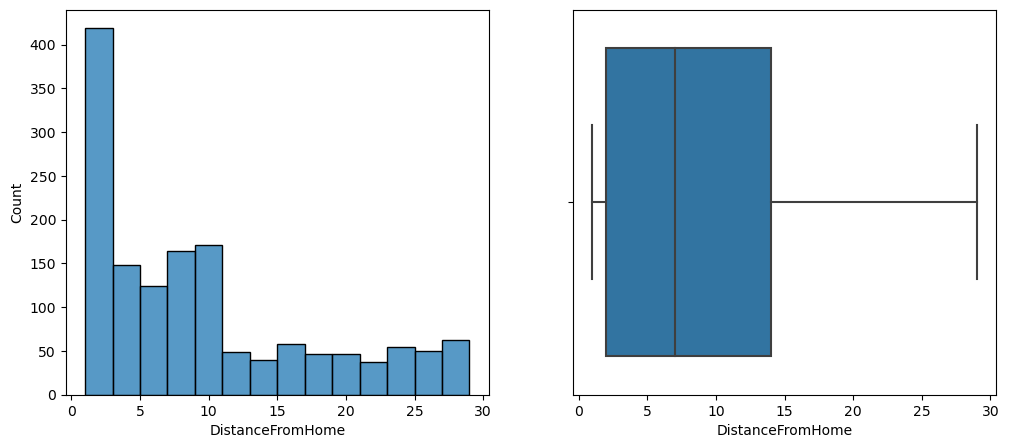

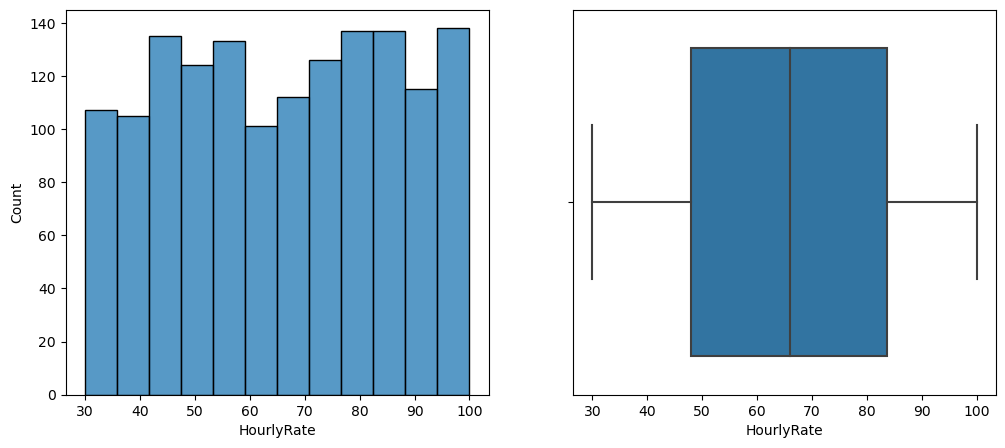

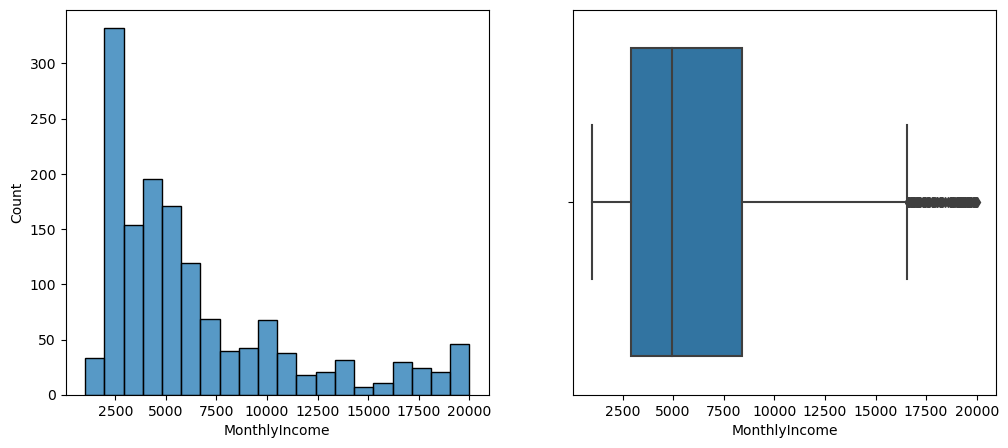

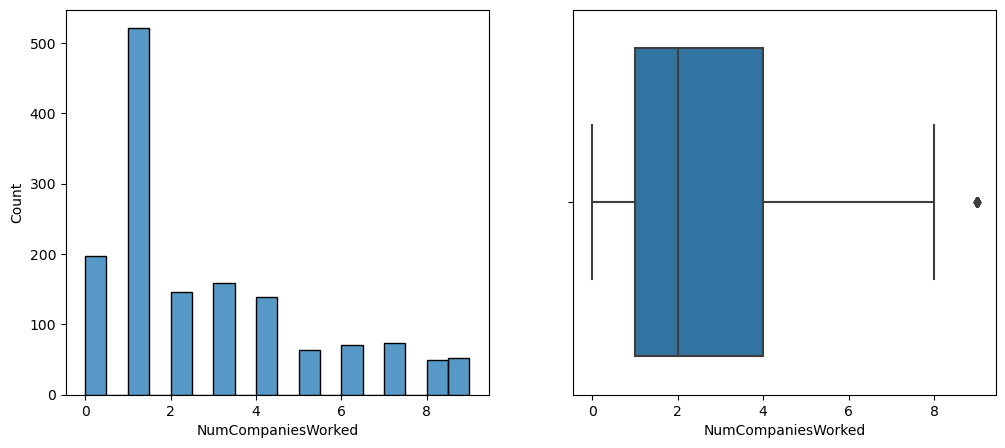

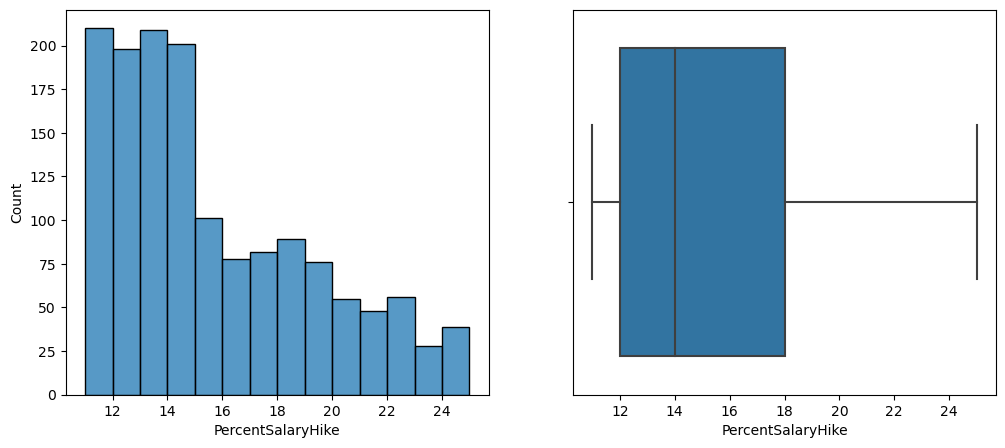

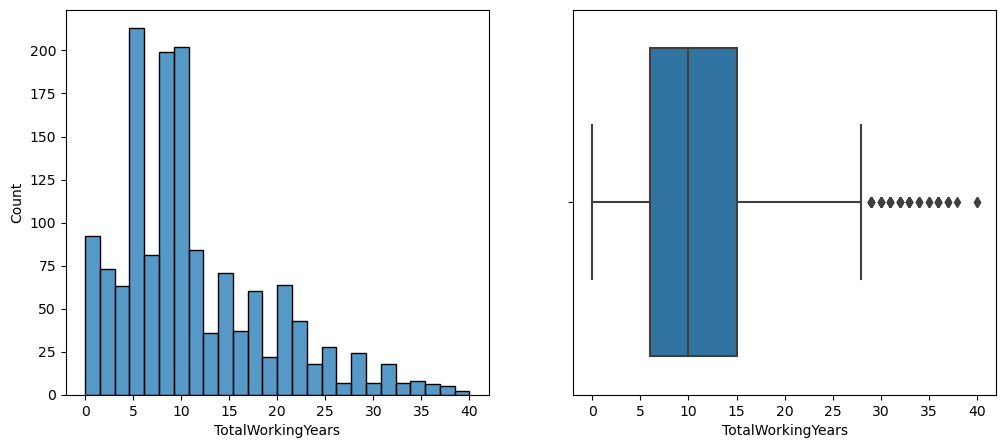

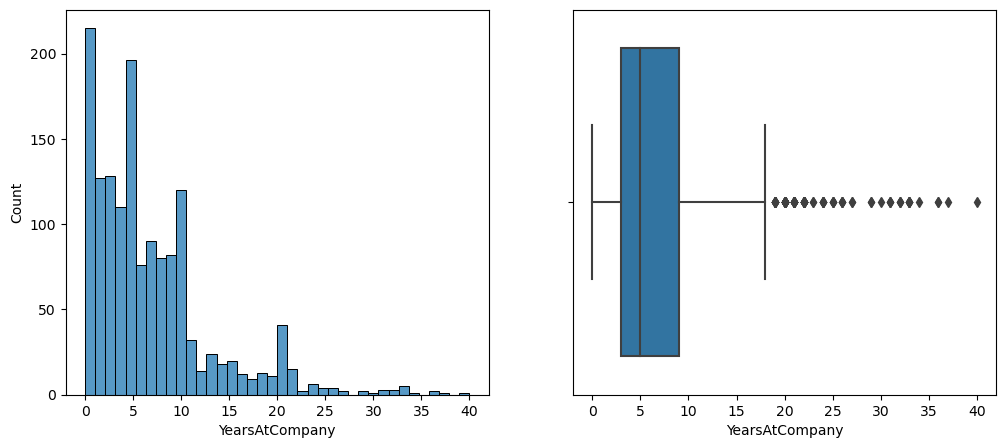

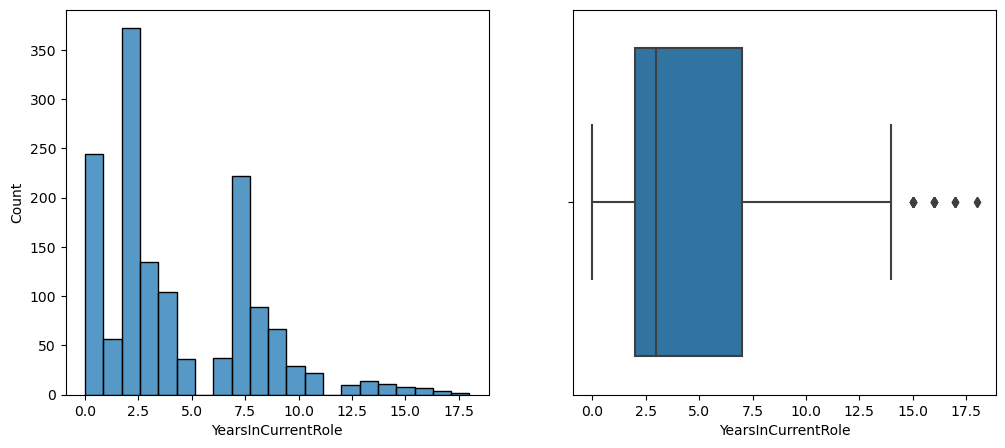

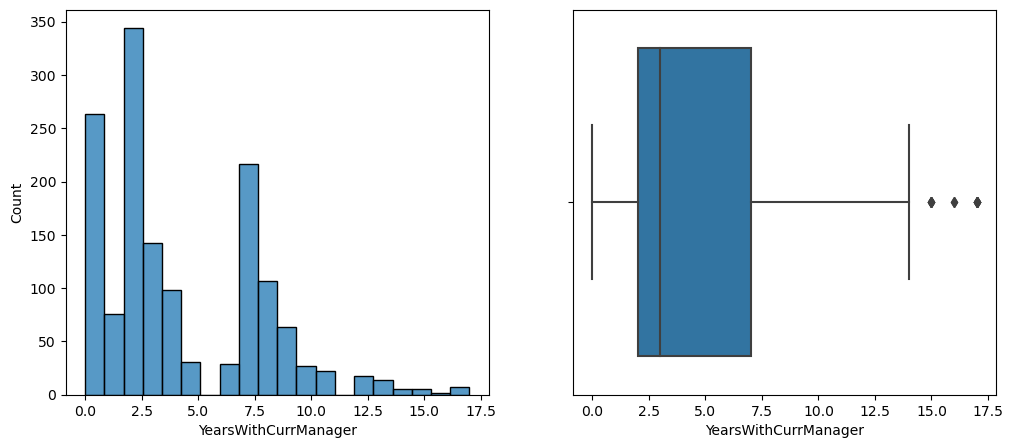

In [7]:
for col1 in Num_var:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[col1])
    plt.subplot(1,2,2)
    sns.boxplot(data=df, x=col1)
    plt.show()

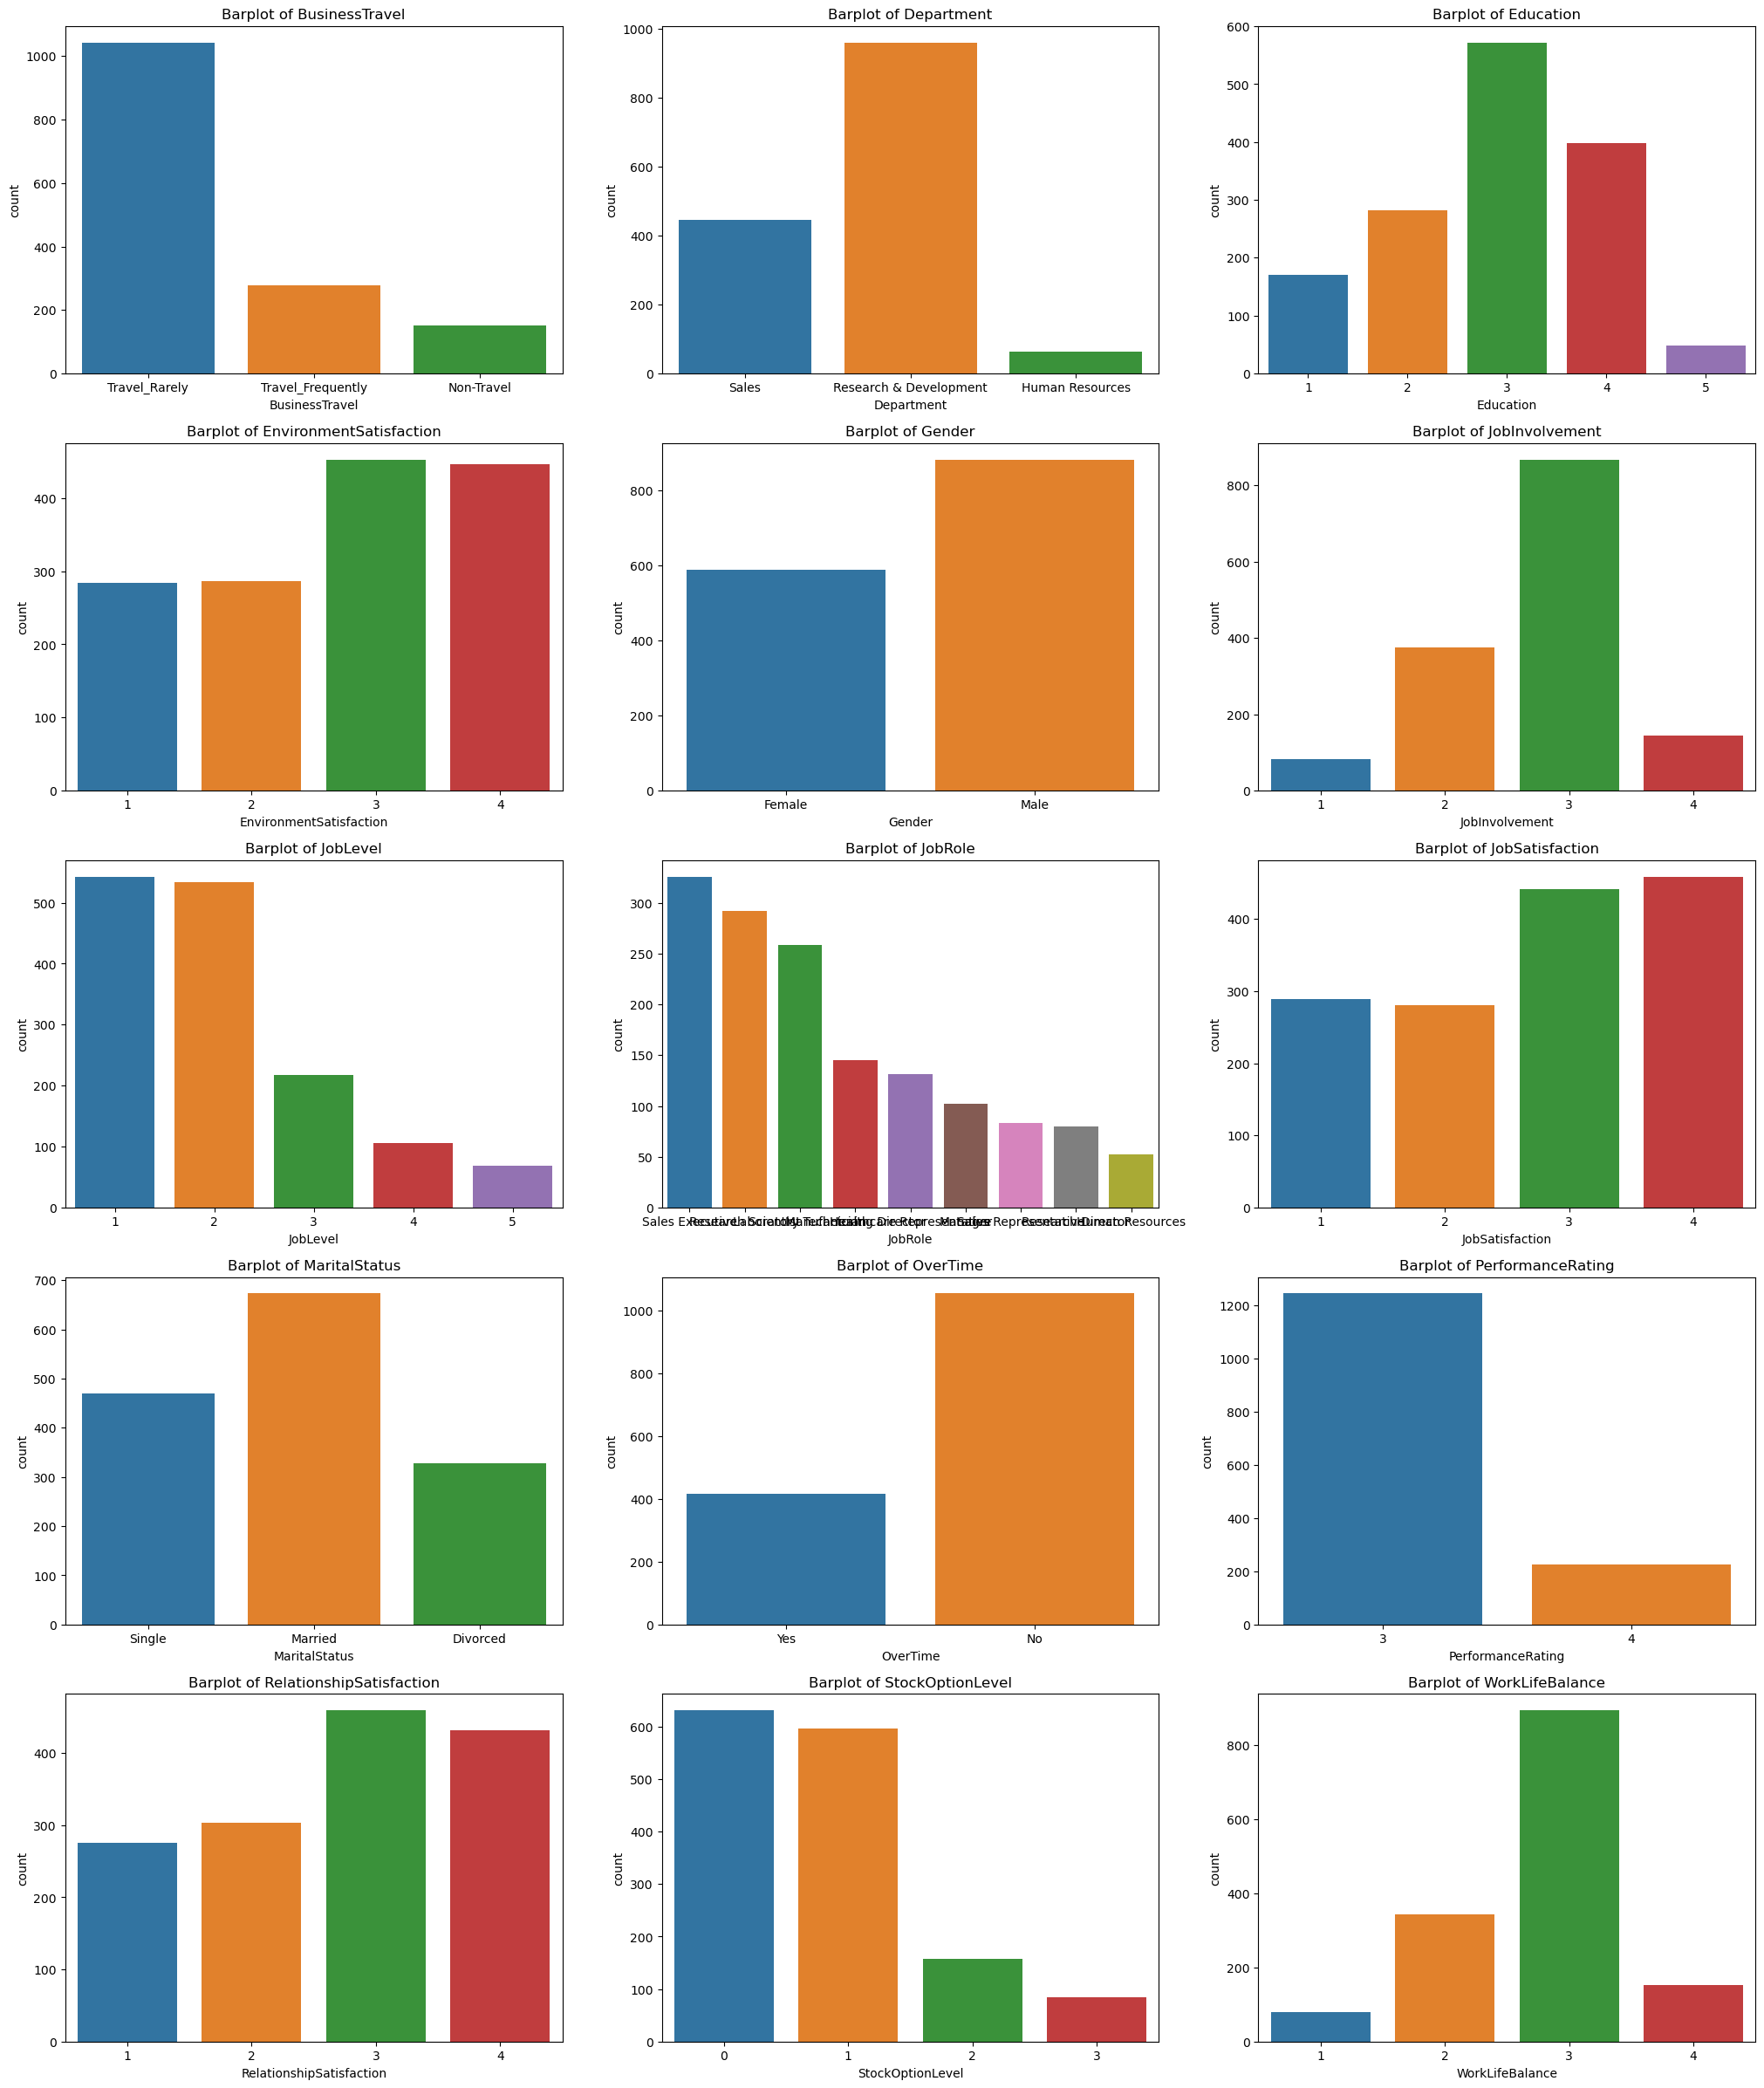

In [8]:
count=1
plt.subplots(figsize=(25,30))
for col in Cat_var:
    plt.subplot(5,3,count)
    sns.countplot(df[col])
    plt.title('Barplot of '+col)
    count=count+1
plt.show()

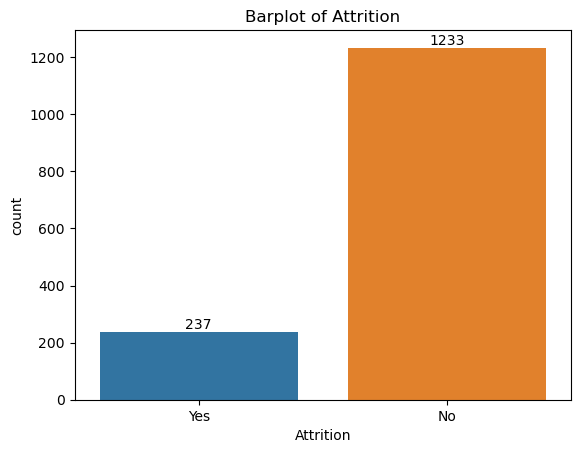

In [9]:
ax=sns.countplot(df['Attrition'])
ax.bar_label(ax.containers[0])
plt.title('Barplot of Attrition')
plt.show()

## BIVARIATE ANALYSIS

## How is attrition dependent on gender?

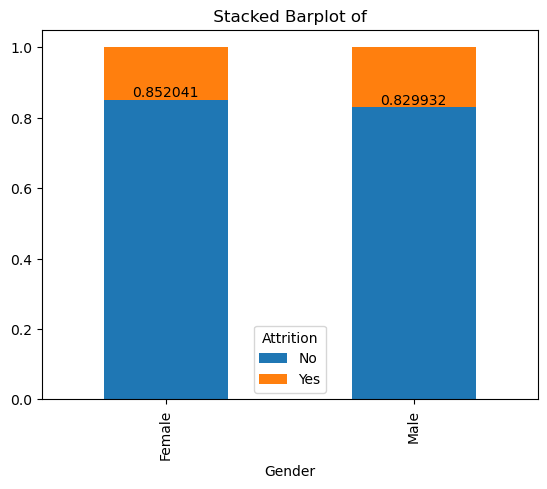

In [10]:
cross_tab_prop = pd.crosstab(index=df['Gender'],columns=df['Attrition'],normalize="index")
ax=cross_tab_prop.plot(kind='bar', stacked=True)
plt.title(' Stacked Barplot of ')
ax.bar_label(ax.containers[0])
plt.show()

The tendency of employees to leave the organization is almost similiar in both the genders

## How is attrition dependent on Marital Status?

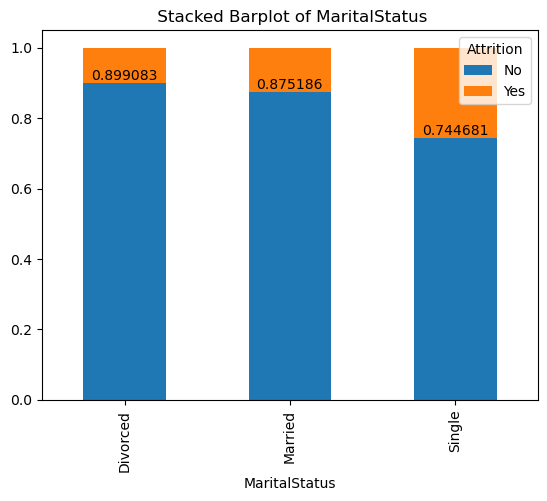

In [11]:
cross_tab_prop = pd.crosstab(index=df['MaritalStatus'],columns=df['Attrition'],normalize="index")
ax=cross_tab_prop.plot(kind='bar', stacked=True)
plt.title(' Stacked Barplot of MaritalStatus')
ax.bar_label(ax.containers[0])
plt.show()

- The tendency of employees to leave the organization is much more when they are single 0

## Does the Department of work impact attrition?

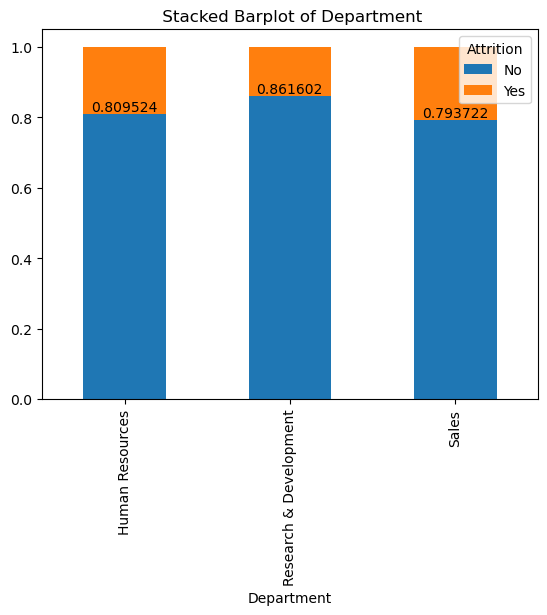

In [12]:
cross_tab_prop = pd.crosstab(index=df['Department'],columns=df['Attrition'],normalize="index")
ax=cross_tab_prop.plot(kind='bar', stacked=True)
plt.title(' Stacked Barplot of Department')
ax.bar_label(ax.containers[0])
plt.show()

This data comprises of only 3 major departments- among which Sales department has the highest attrition rates, followed by the Human Resource Department (19.05%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(13.83%).

## Does company stocks for employees impact attrition?

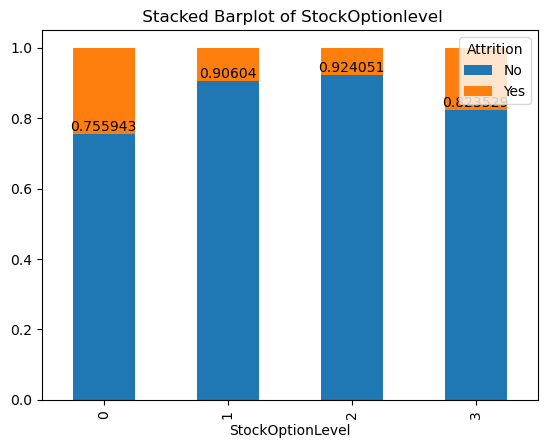

In [13]:
cross_tab_prop = pd.crosstab(index=df['StockOptionLevel'],columns=df['Attrition'],normalize="index")
ax=cross_tab_prop.plot(kind='bar', stacked=True)
plt.title(' Stacked Barplot of StockOptionlevel')
ax.bar_label(ax.containers[0])
plt.show()

- The tendency of employees to leave the organization is much more when the stock availing options are limited.
Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stcok options have a freedom to leave the organization at will.

## Does Overtime impact Attrition?

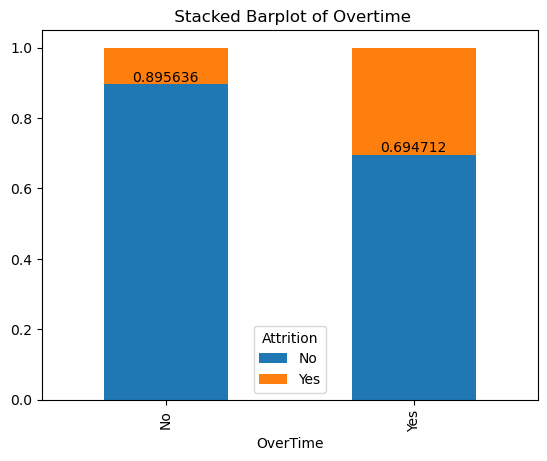

In [14]:
cross_tab_prop = pd.crosstab(index=df['OverTime'],columns=df['Attrition'],normalize="index")
ax=cross_tab_prop.plot(kind='bar', stacked=True)
plt.title(' Stacked Barplot of Overtime')
ax.bar_label(ax.containers[0])
plt.show()

- The tendency of employees to leave the organization is much more when they are working overtime

## How is attrition dependent on Age?

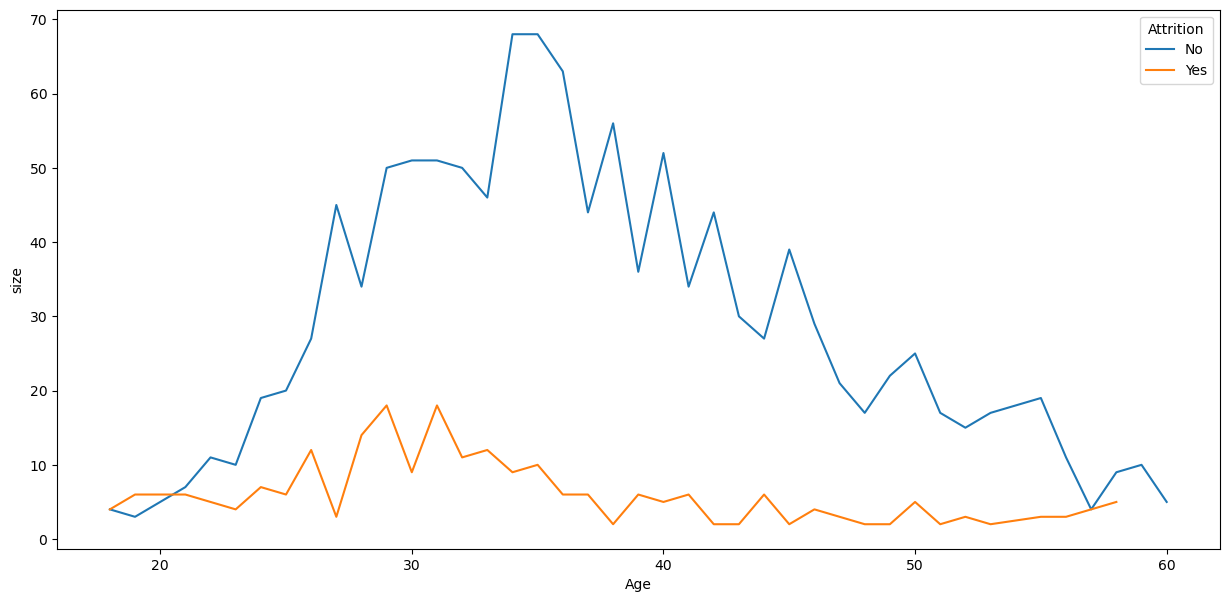

In [15]:
age_att=df.groupby(['Age','Attrition'],as_index=False).size()
plt.figure(figsize=(15,7))
sns.lineplot(x='Age',y='size', hue='Attrition', data=age_att)
plt.show()

- the attrition is maximum between the age groups 28-32.
- The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21

## Is income the main factor towards employee attrition?

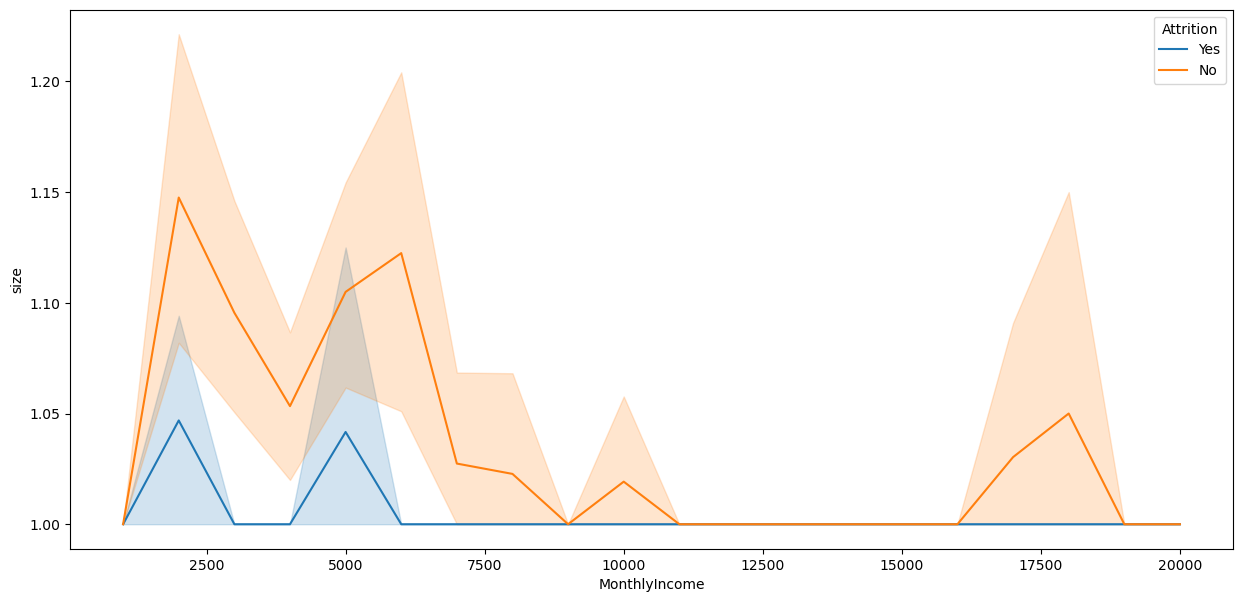

In [16]:
rate_att=df.groupby(['MonthlyIncome','Attrition'],as_index=False).size()
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
plt.figure(figsize=(15,7))
sns.lineplot(x='MonthlyIncome',y='size', hue='Attrition', data=rate_att)
plt.show()

In the above chart, the attrition rate is evidently high at very low income levels- less than 5k monthly. This decreases further- but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line

In [17]:
import hvplot

## How does the environment satisfaction impact attrition?

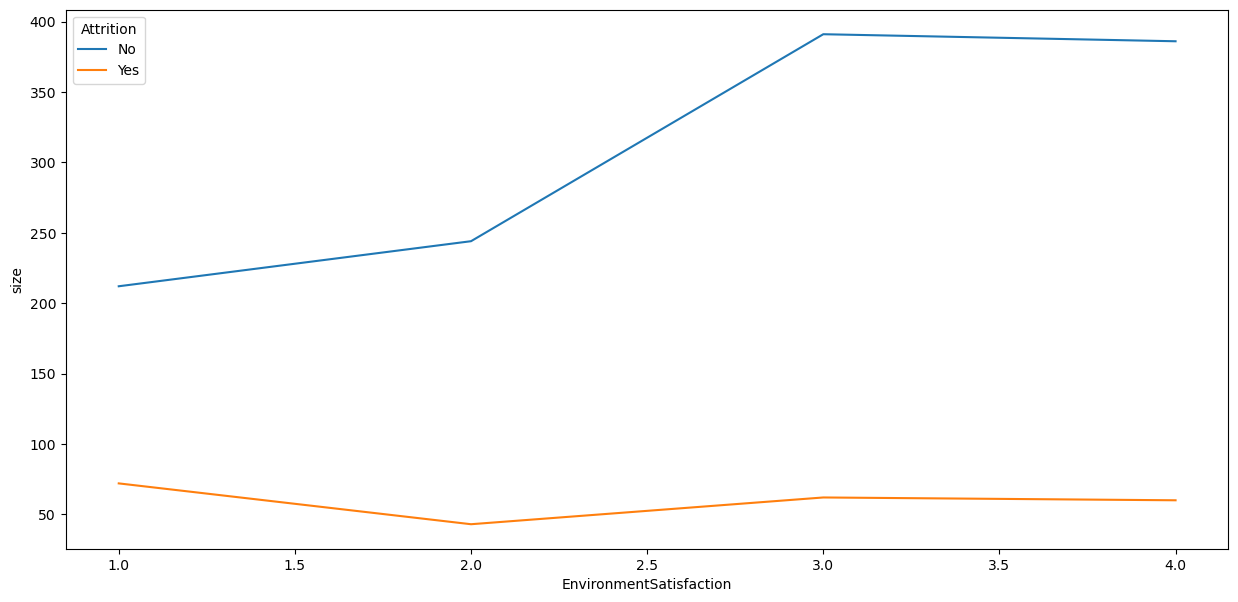

In [18]:
sats_att=df.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='size')
plt.figure(figsize=(15,7))
sns.lineplot(x='EnvironmentSatisfaction',y='size', hue='Attrition', data=sats_att)
plt.show()

- In the satisfaction Level 1-2, the chances of peope leaving the organization slightly decreases. This is indicative of the better hopes with which people stay in an organization.

- However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The attrition rate is almost stagnant for the higher satisfaction levels

## How does self Job Satisfaction impact the Attrition?

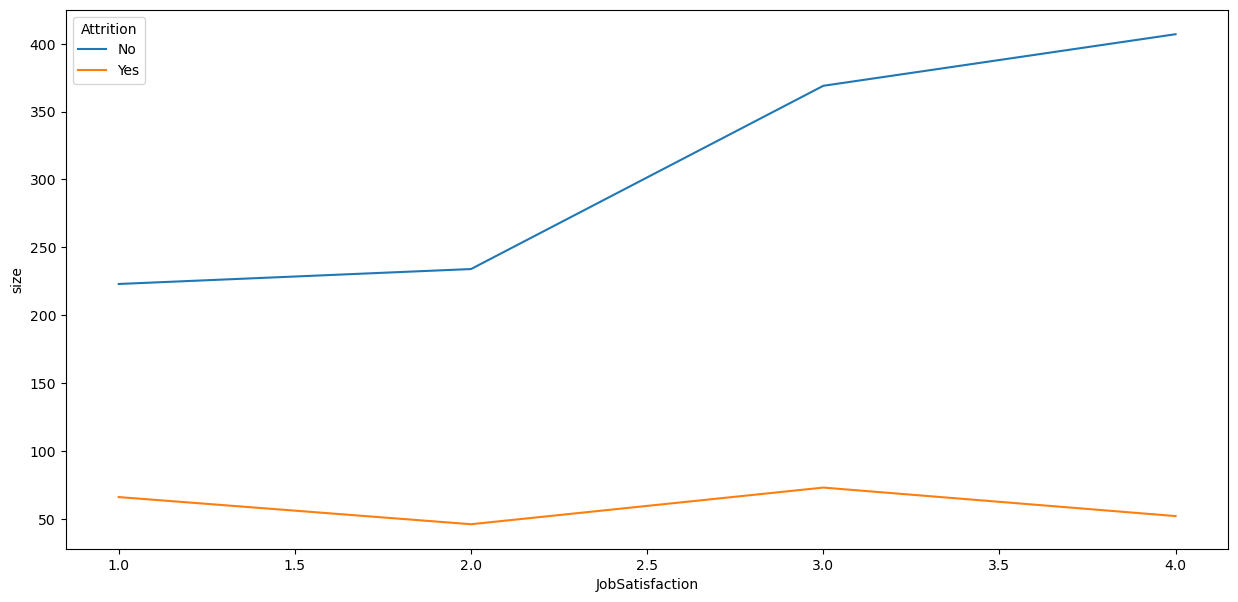

In [19]:
jsats_att=df.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='size')
plt.figure(figsize=(15,7))
sns.lineplot(x='JobSatisfaction',y='size', hue='Attrition', data=jsats_att)
plt.show()

- With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above.
- Also from range 1-2 range we can infer, the attrition level falls, but raises from 2-3, where the people tend to choose better opportunities.

## How does work experience affect attrition?

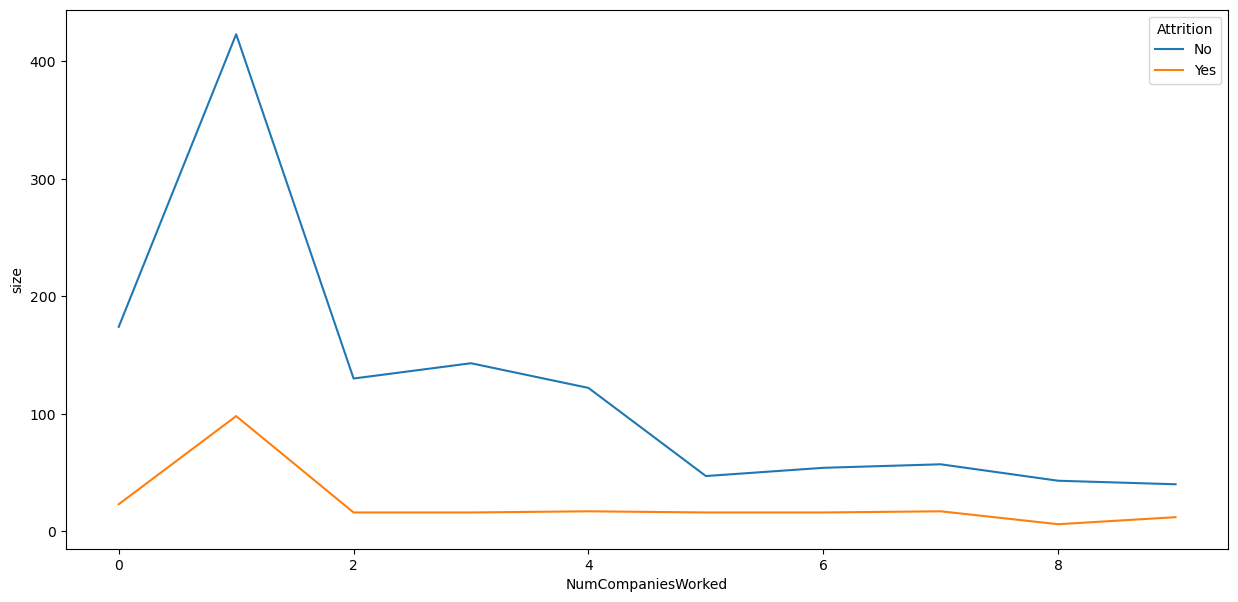

In [20]:
ncwrd_att=df.groupby(['NumCompaniesWorked','Attrition'],as_index=False).size()
plt.figure(figsize=(15,7))
sns.lineplot(x='NumCompaniesWorked',y='size', hue='Attrition', data=ncwrd_att)
plt.show()

- As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

## How does Work duration in current role impact Attrition?

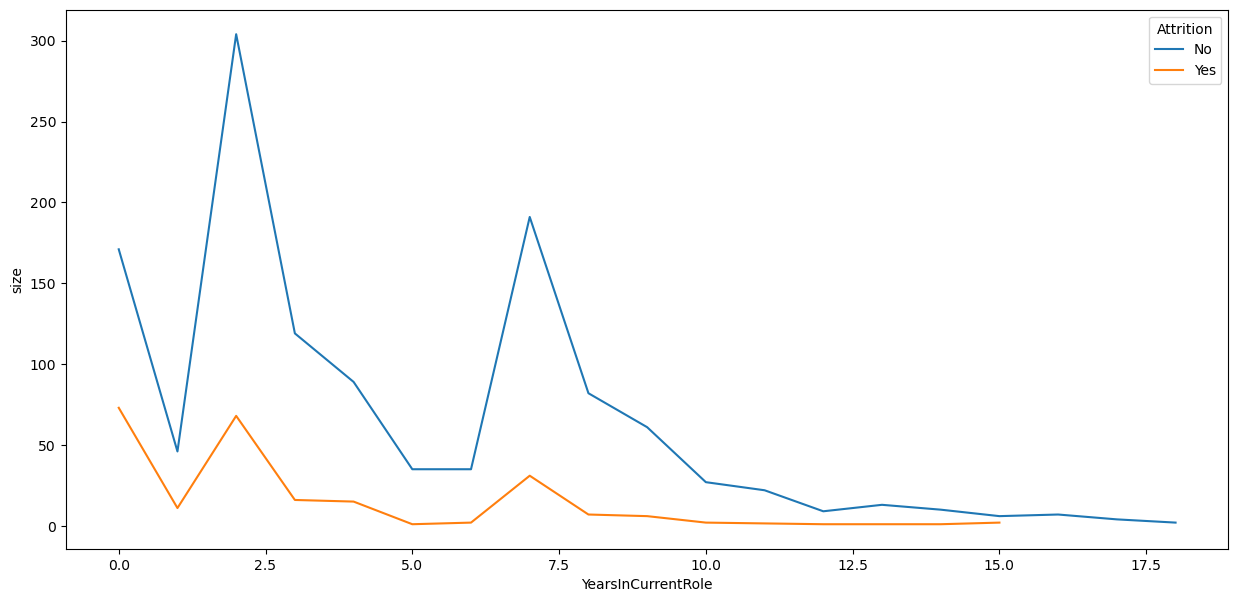

In [21]:
yrscr_att=df.groupby(['YearsInCurrentRole','Attrition'],as_index=False).size()
plt.figure(figsize=(15,7))
sns.lineplot(x='YearsInCurrentRole',y='size', hue='Attrition', data=yrscr_att)
plt.show()

- We have seen people are more prone to leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer for moving in an upward role

## Does Hike percentage impact Attrition?

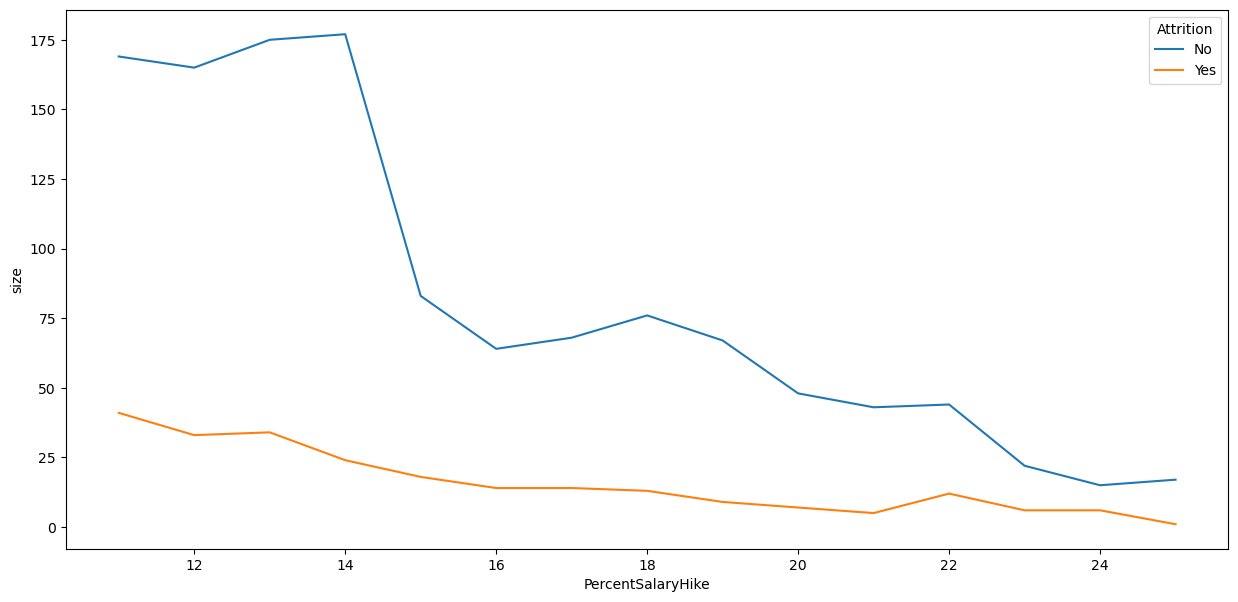

In [22]:
hike_att=df.groupby(['PercentSalaryHike','Attrition'],as_index=False).size()
plt.figure(figsize=(15,7))
sns.lineplot(x='PercentSalaryHike',y='size', hue='Attrition', data=hike_att)
plt.show()

- Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike

## Are managers a reason of people resigning??

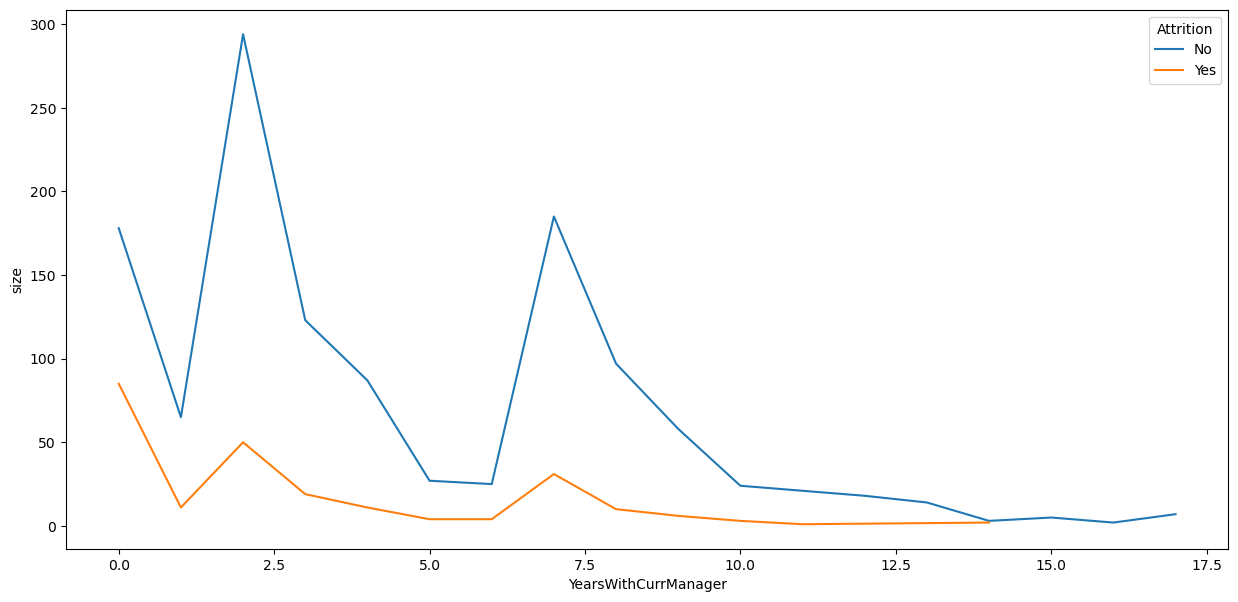

In [23]:
man_att=df.groupby(['YearsWithCurrManager','Attrition'],as_index=False).size()
plt.figure(figsize=(15,7))
sns.lineplot(x='YearsWithCurrManager',y='size', hue='Attrition', data=man_att)
plt.show()

We notice 3 major spikes in the attrition rate, when we are analyzing the relationship of an employee with their manager.
- At the very start, where the time spent with the manager is relatively less- people tend to leave their jobs- considering their relationship with their previous managers.
- At an average span of 2 years, when employees feel they need an improvement, they also tend to go for a change.
- When the time spent with the manager is slightly higher (about 7 years)- people tend to find their career progression stagnant, and tend to go for a change.
- But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.

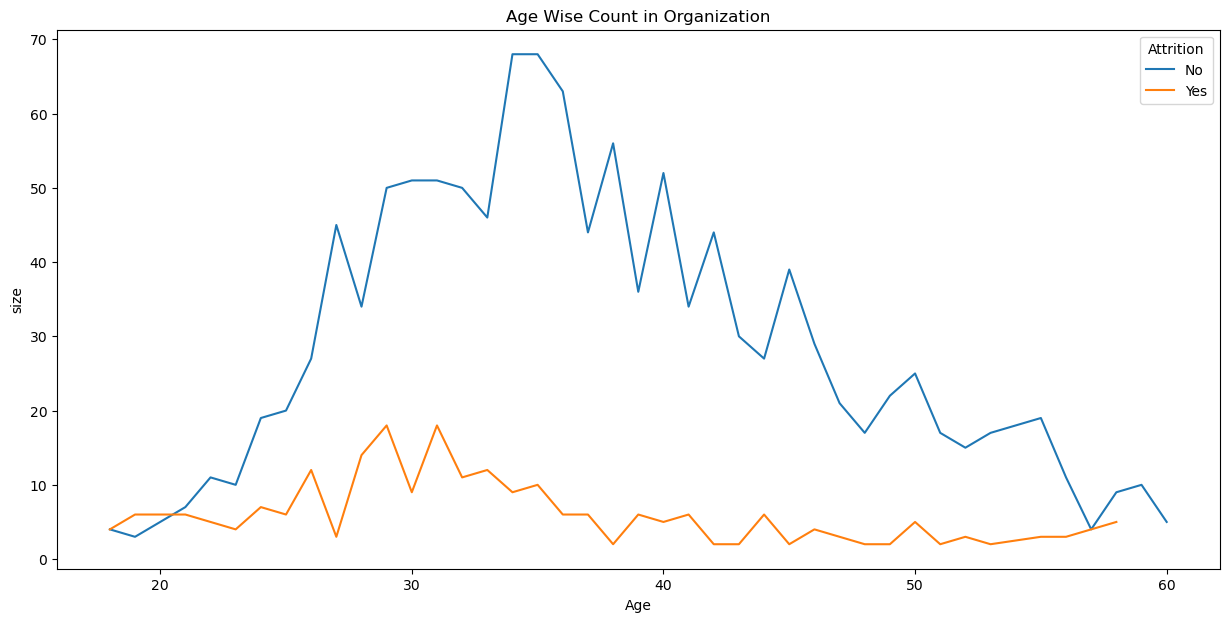

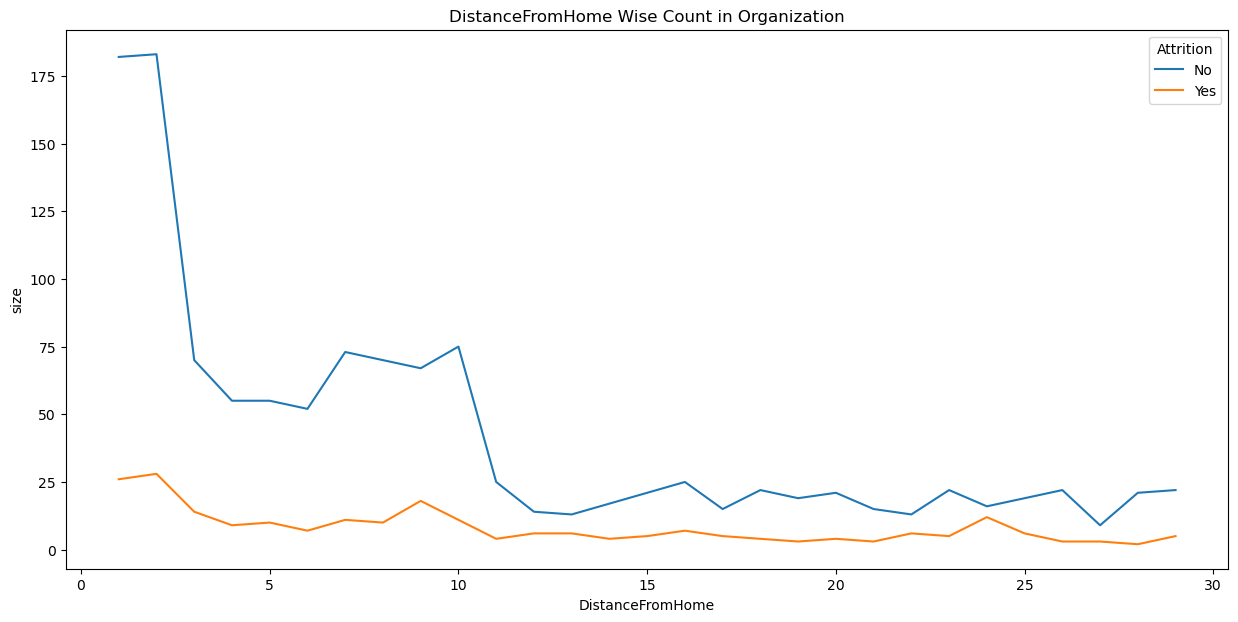

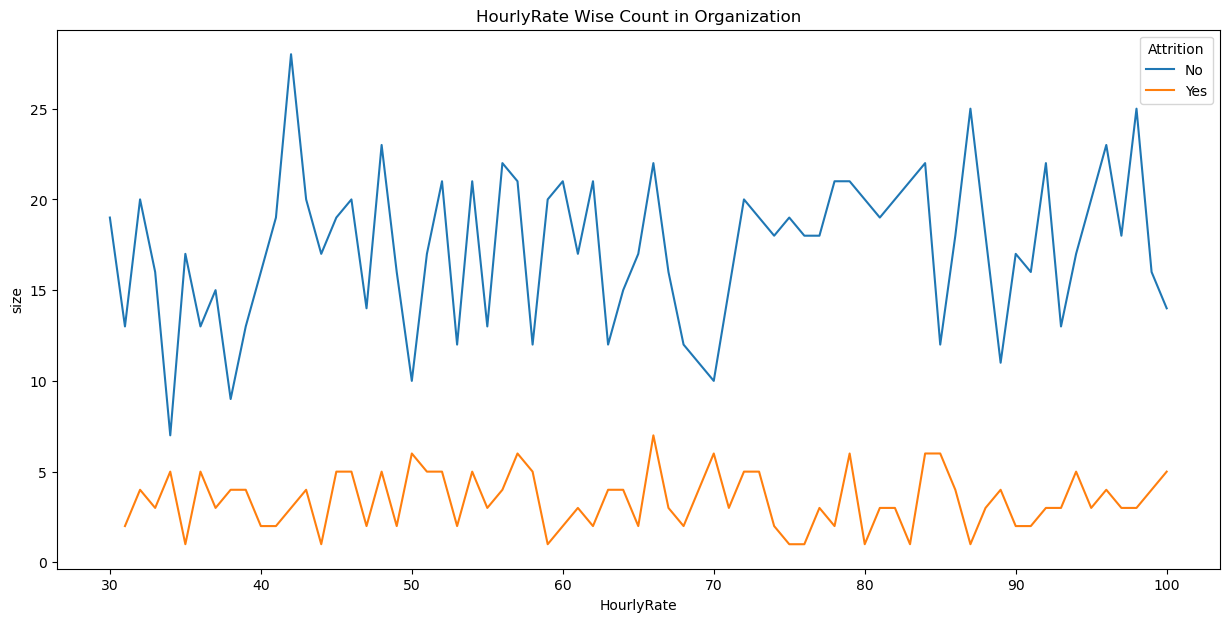

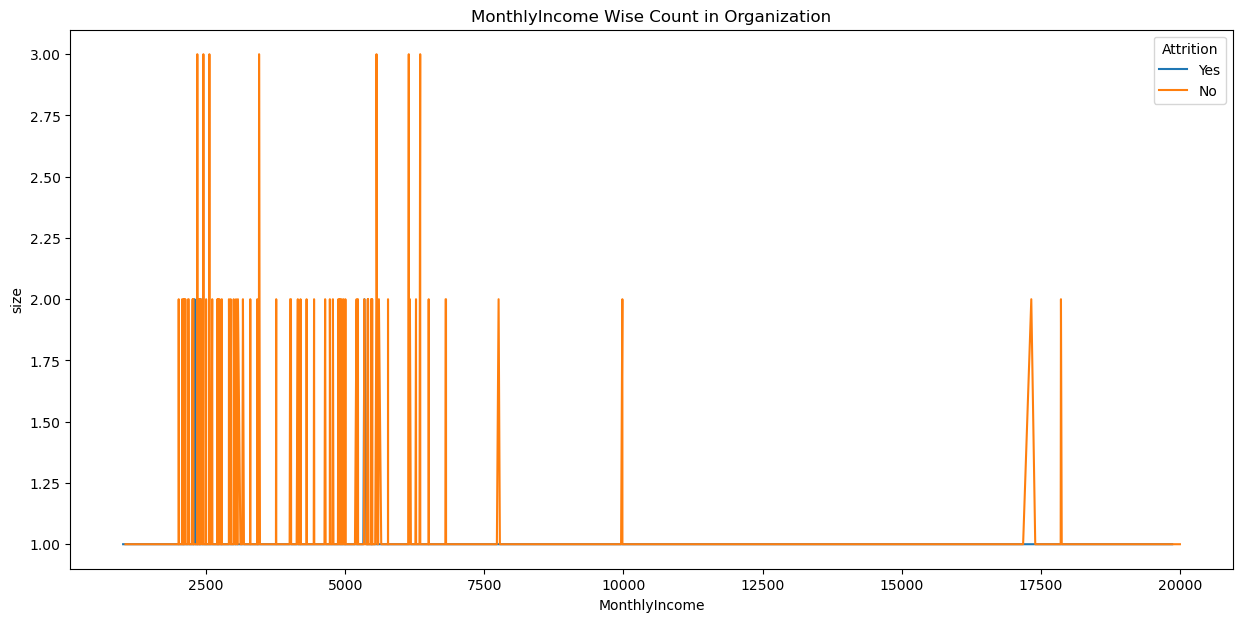

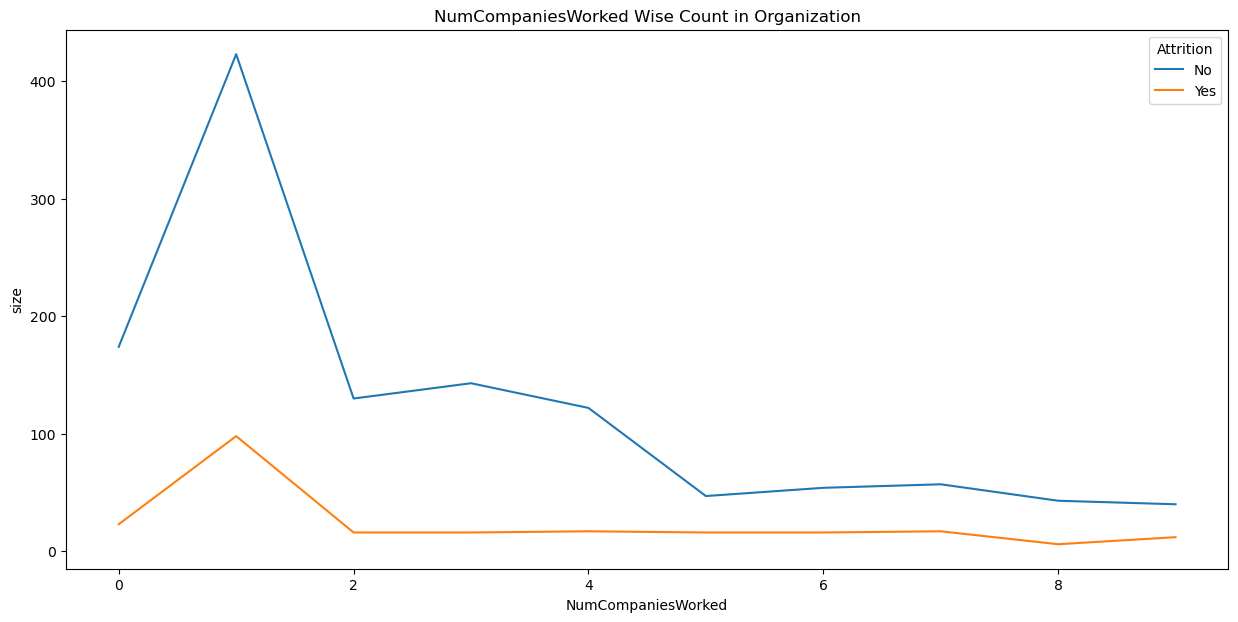

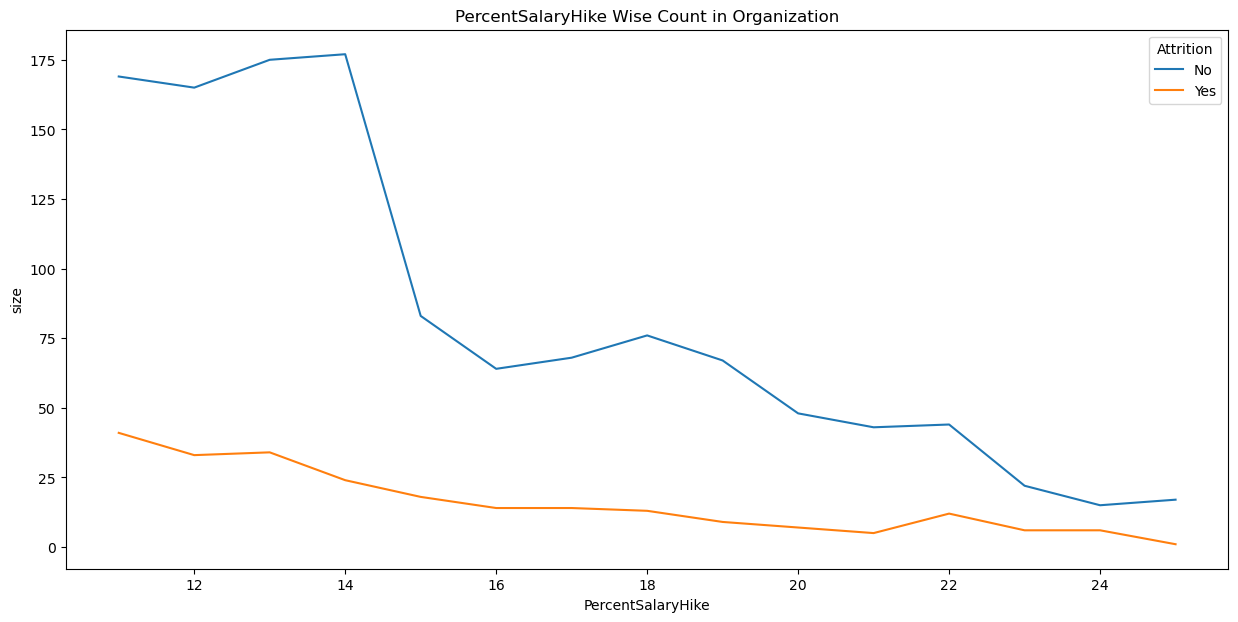

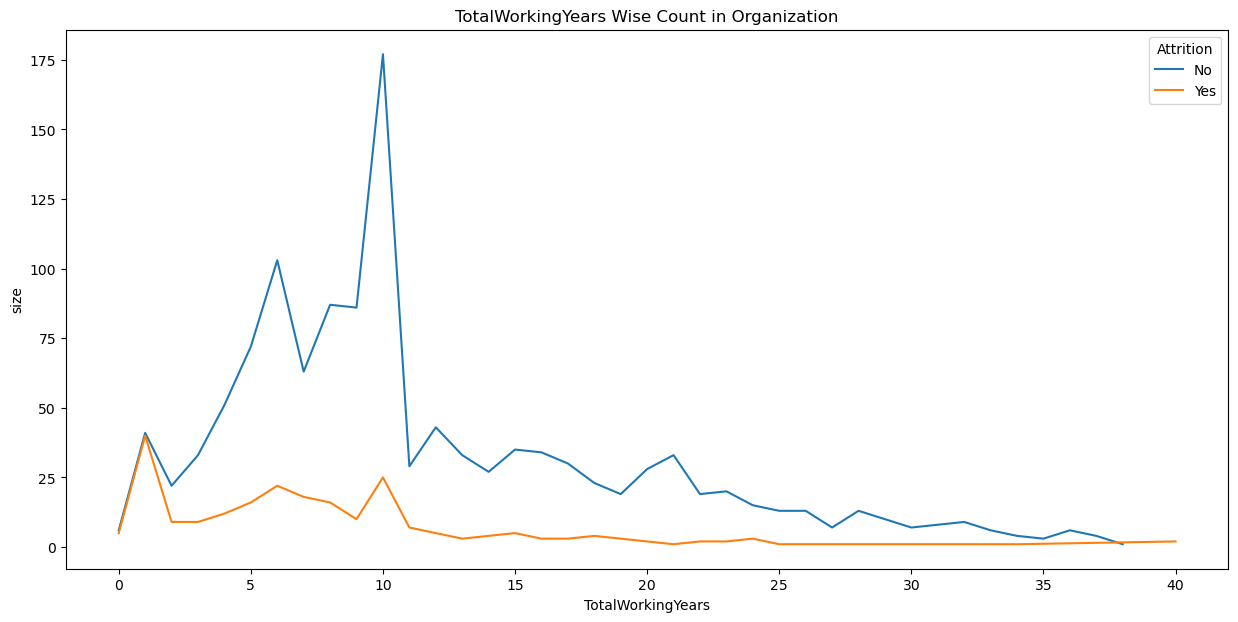

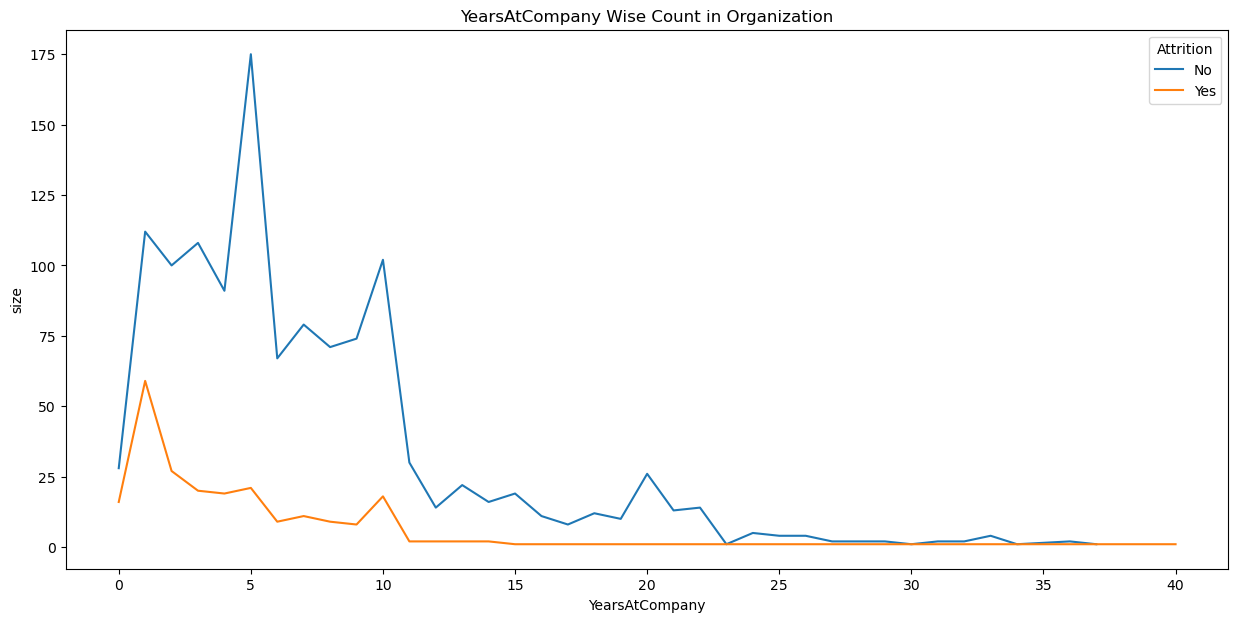

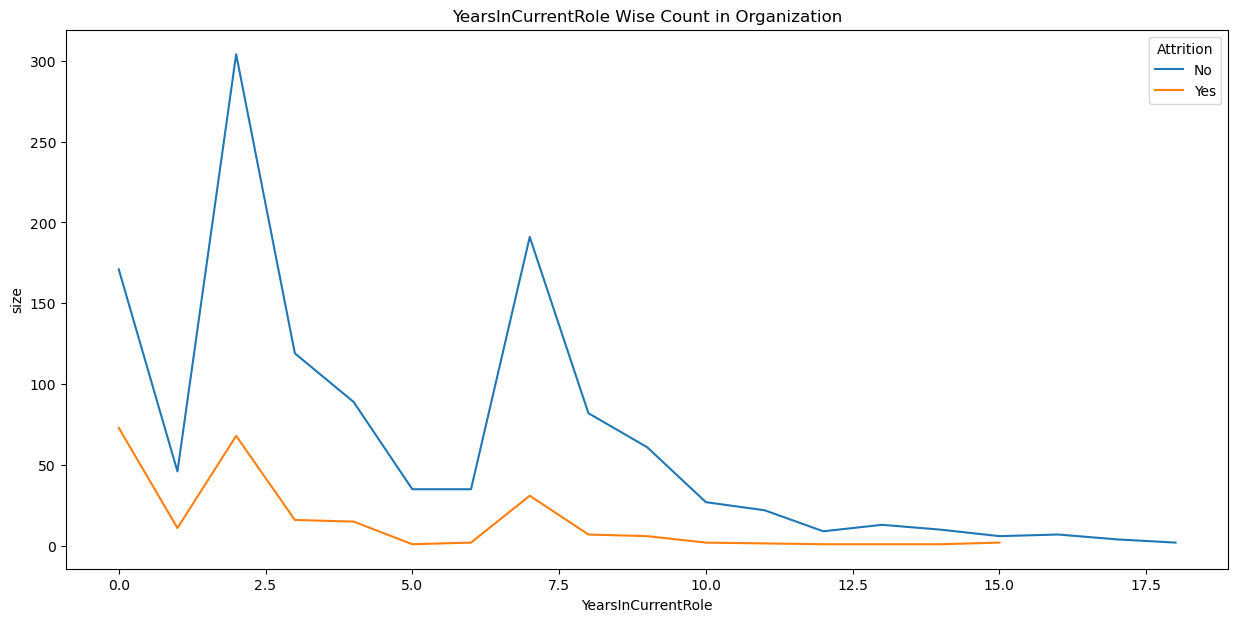

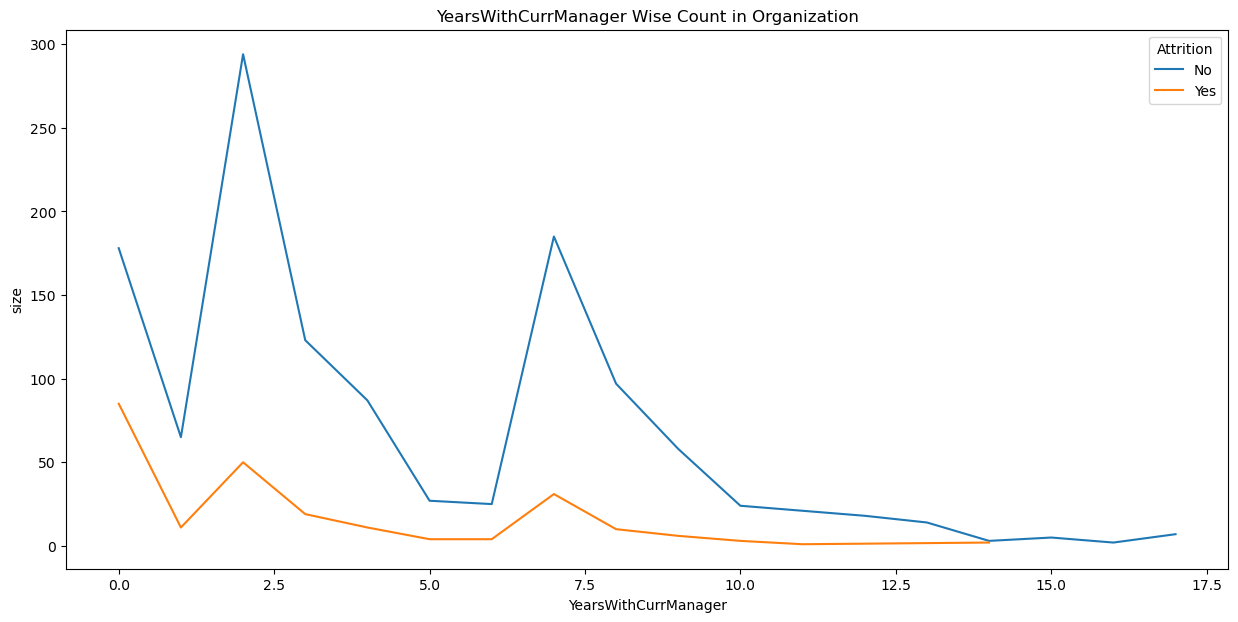

In [24]:
for i in range(len(Num_var)):
    man_att=df.groupby([Num_var[i],'Attrition'],as_index=False).size()
    plt.figure(figsize=(15,7))
    sns.lineplot(x=Num_var[i],y='size', hue='Attrition', data=man_att)
    plt.title(Num_var[i] +' Wise Count in Organization')
    plt.show()

<Figure size 1500x1000 with 0 Axes>

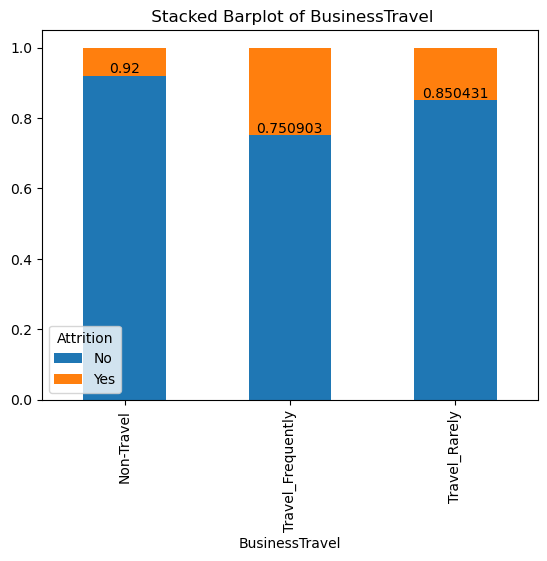

<Figure size 1500x1000 with 0 Axes>

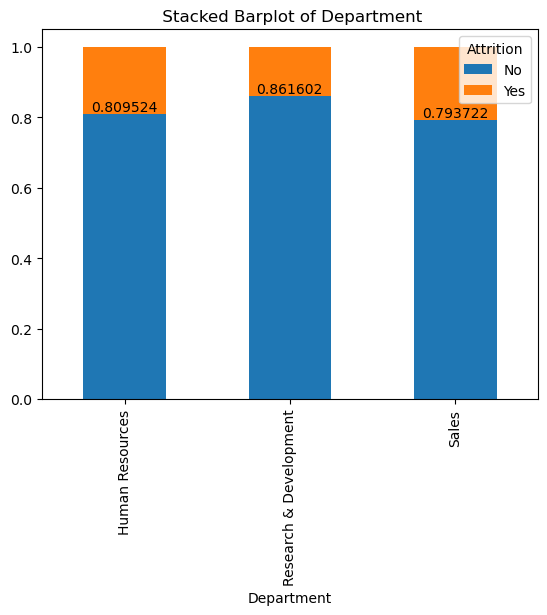

<Figure size 1500x1000 with 0 Axes>

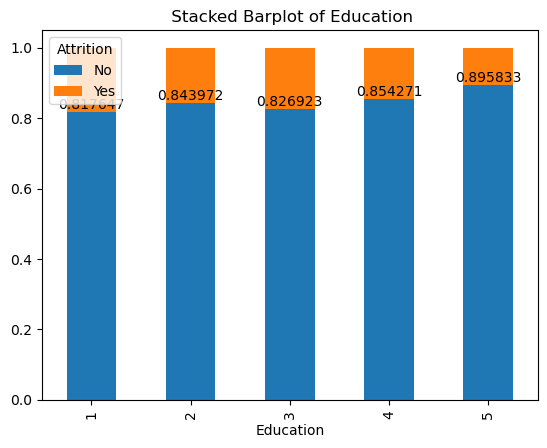

<Figure size 1500x1000 with 0 Axes>

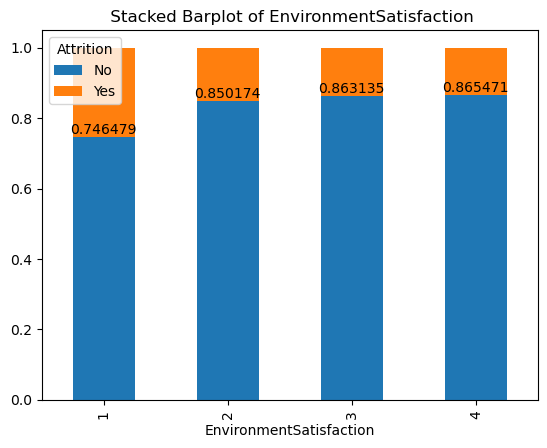

<Figure size 1500x1000 with 0 Axes>

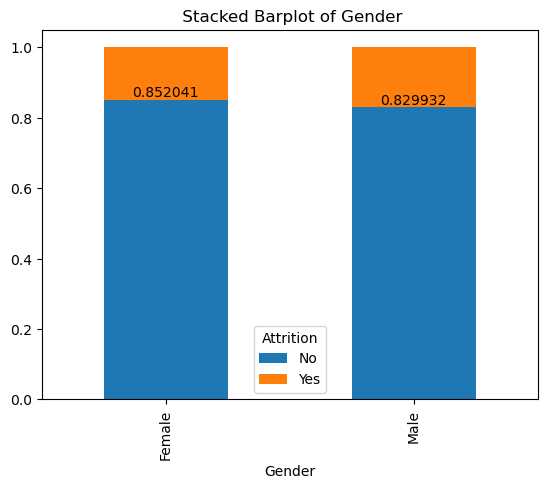

<Figure size 1500x1000 with 0 Axes>

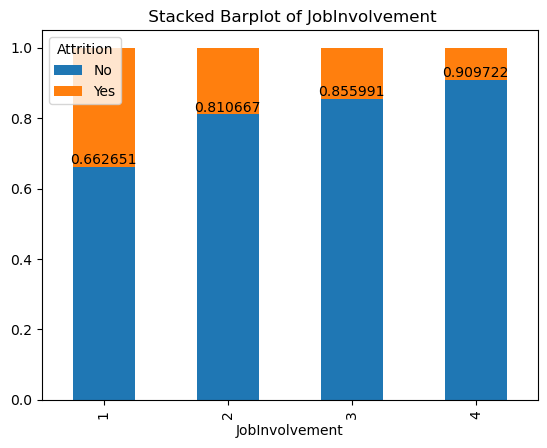

<Figure size 1500x1000 with 0 Axes>

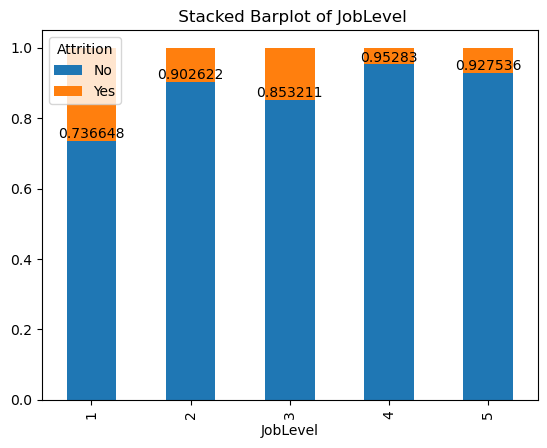

<Figure size 1500x1000 with 0 Axes>

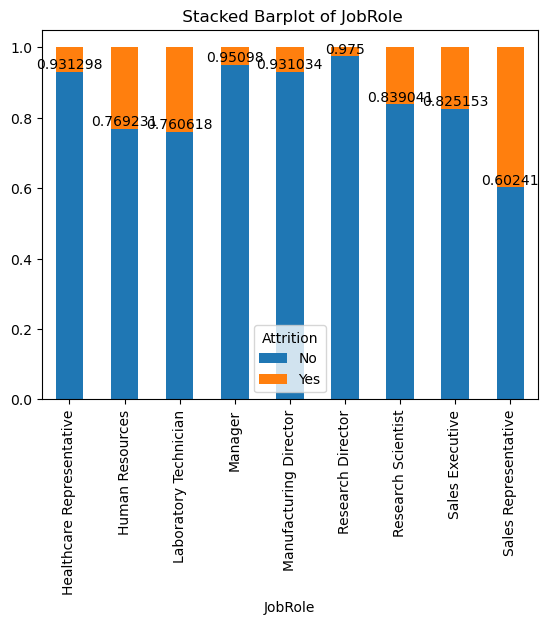

<Figure size 1500x1000 with 0 Axes>

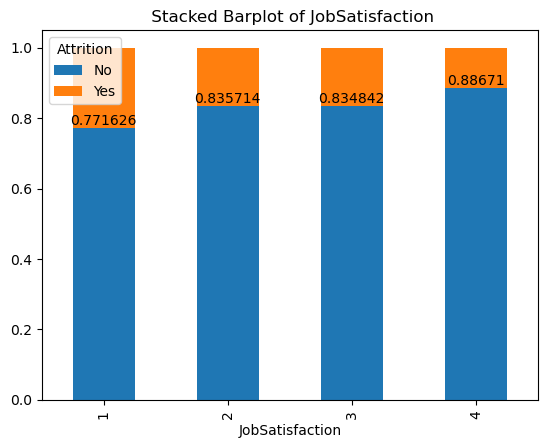

<Figure size 1500x1000 with 0 Axes>

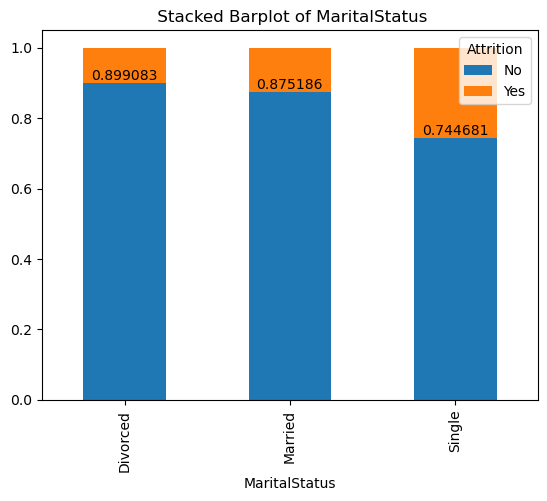

<Figure size 1500x1000 with 0 Axes>

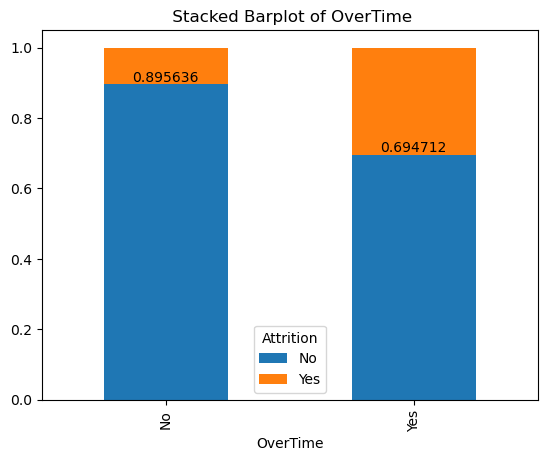

<Figure size 1500x1000 with 0 Axes>

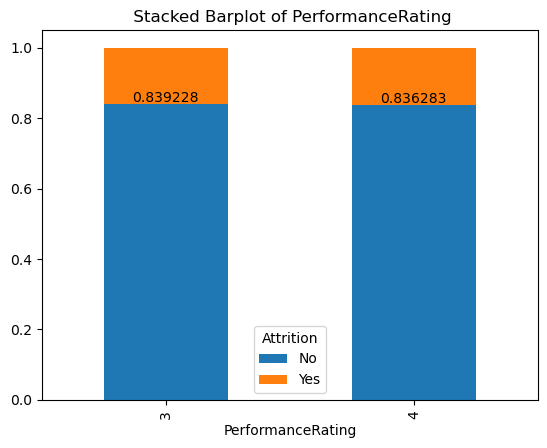

<Figure size 1500x1000 with 0 Axes>

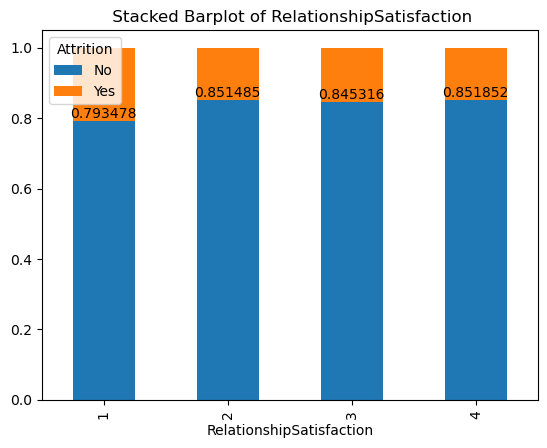

<Figure size 1500x1000 with 0 Axes>

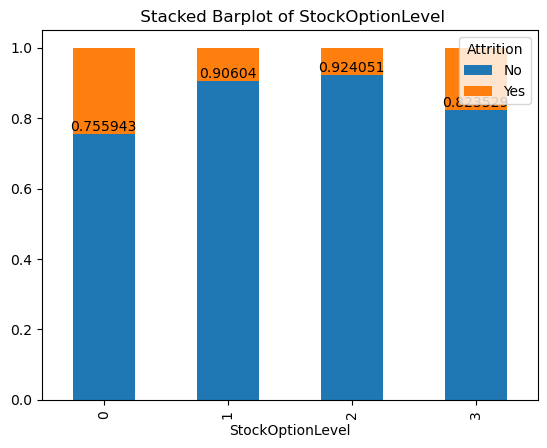

<Figure size 1500x1000 with 0 Axes>

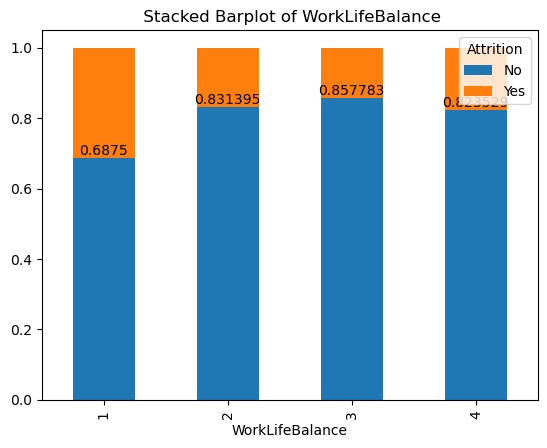

In [25]:
for i in range(len(Cat_var)):
    cross_tab_prop = pd.crosstab(index=df[Cat_var[i]],columns=df['Attrition'],normalize="index")
    plt.figure(figsize=(15,10))
    ax=cross_tab_prop.plot(kind='bar', stacked=True)
    plt.title(' Stacked Barplot of '+Cat_var[i])
    ax.bar_label(ax.containers[0])
    plt.show()

<Figure size 2500x1500 with 0 Axes>

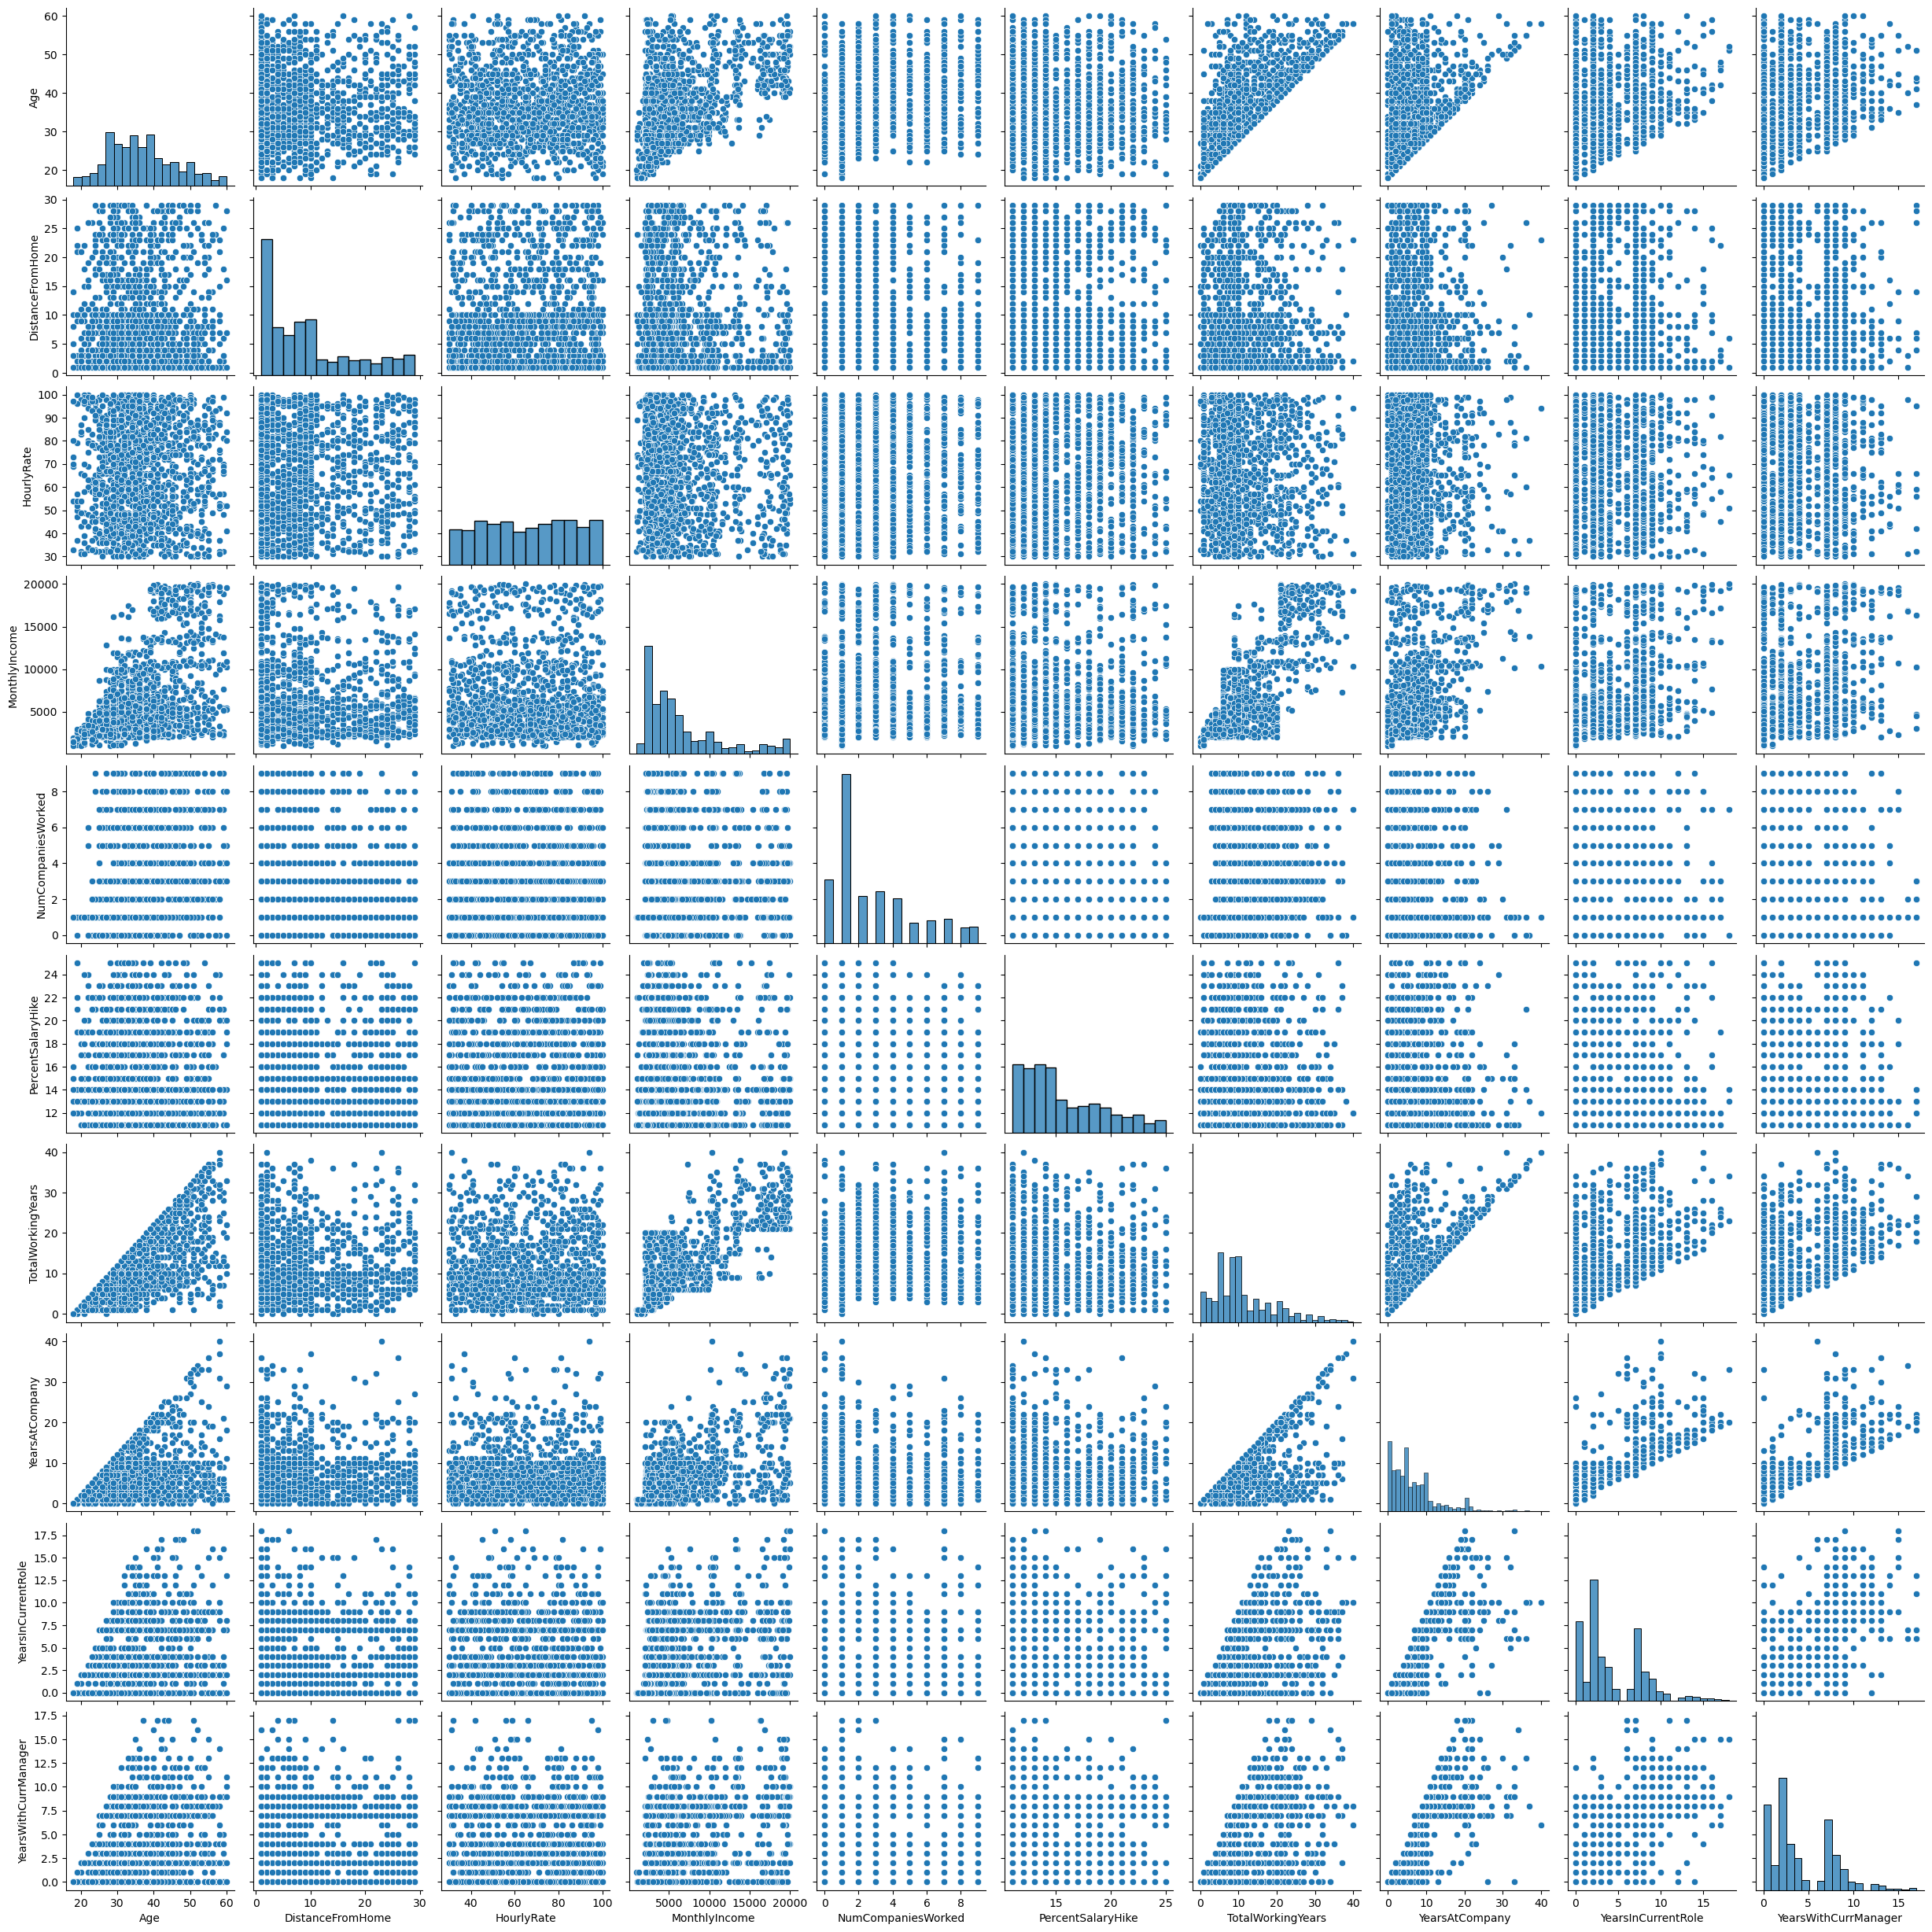

In [26]:
plt.figure(figsize=(25,15))
sns.pairplot(df[Num_var])
plt.show()

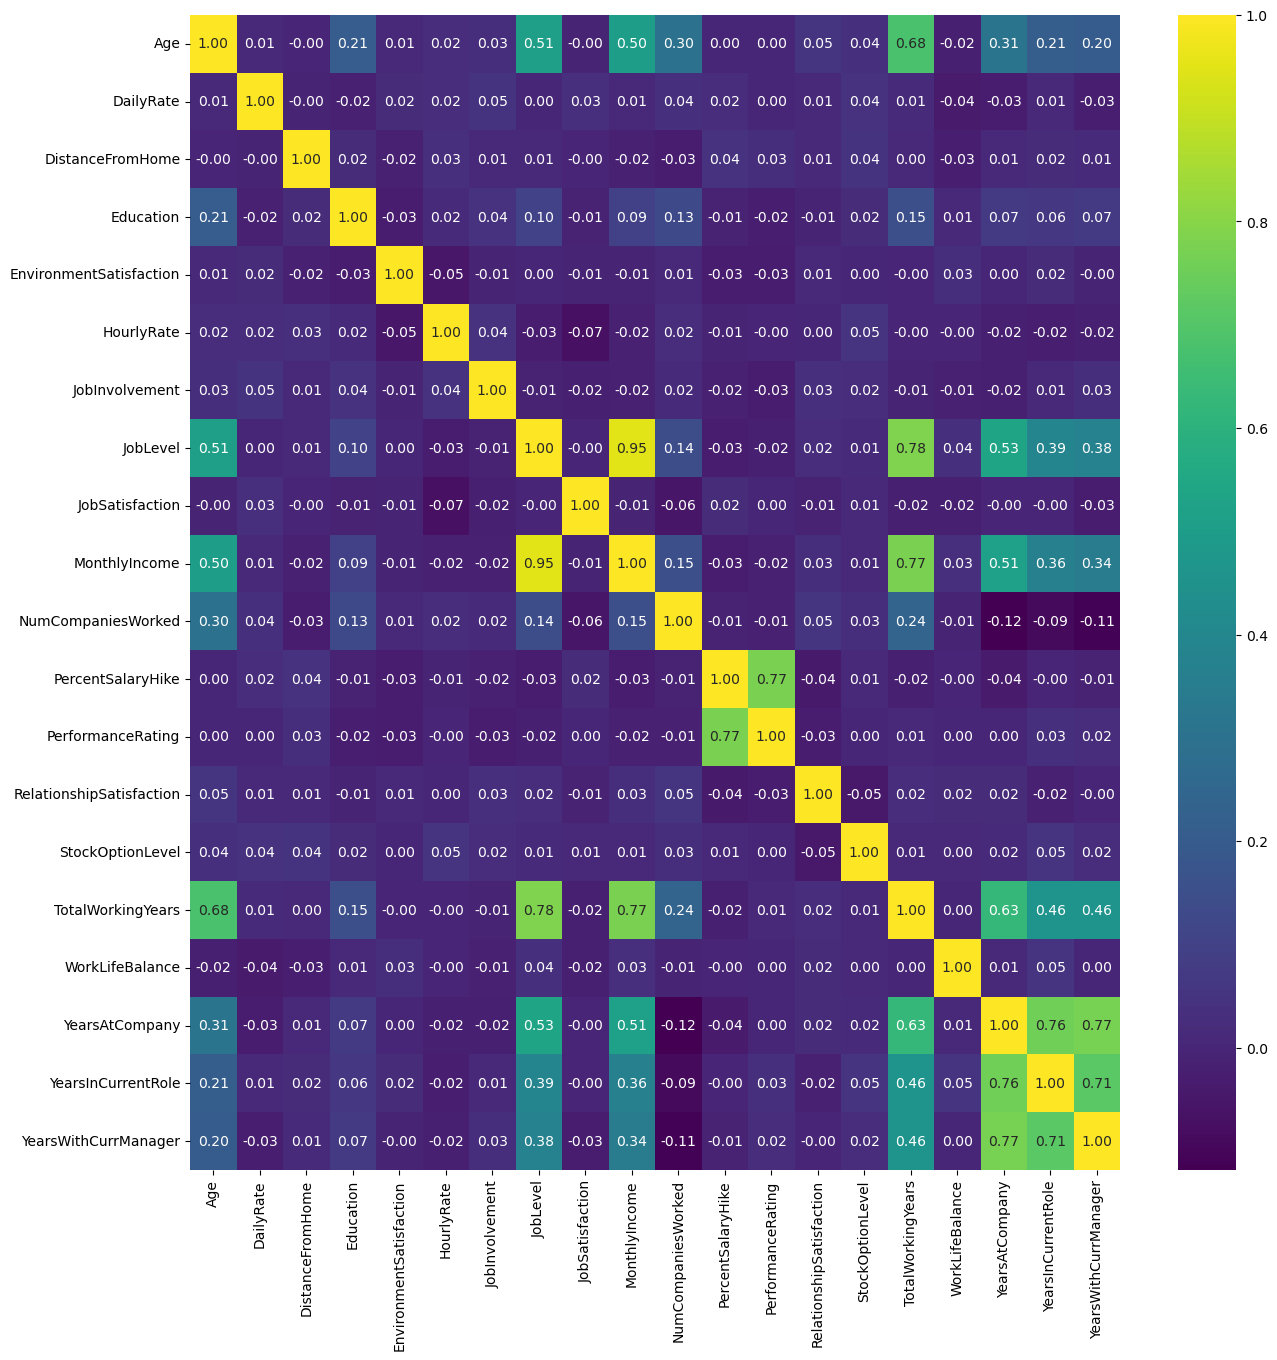

In [27]:
X=df[['Age', 'DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel', 
      'JobSatisfaction','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
      'StockOptionLevel','TotalWorkingYears', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager']]
y=df[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')
plt.show()

In [28]:
cont_var=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
      'NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','YearsAtCompany',
      'YearsInCurrentRole','YearsWithCurrManager','Education','EnvironmentSatisfaction','JobInvolvement',
      'JobLevel','JobSatisfaction','WorkLifeBalance','PerformanceRating','RelationshipSatisfaction']

cat_var=['BusinessTravel','Department','Gender','JobRole','MaritalStatus','OverTime']

colum=cont_var+cat_var

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [30]:
df['Attrition'] = df.Attrition.astype("category").cat.codes
X = df.drop('Attrition', axis=1)
y = df.Attrition
X=X[colum]

### Scaling the data

In [31]:
import random
random.seed(10)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
label = OneHotEncoder()
scaler= MinMaxScaler()
X_train = pd.get_dummies(X_train, columns = cat_var)
X_test = pd.get_dummies(X_test, columns = cat_var)
X_train[cont_var]=scaler.fit_transform(X_train[cont_var])
X_test[cont_var]=scaler.transform(X_test[cont_var])

### Balancing the data using SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
X_train_sm, y_train_sm = oversampler.fit_resample(X_train,y_train)

In [35]:
print('-----------------Before SMOTE------------------')
print('0      '+str(len(X_train)-sum(y_train)))
print('1      '+str(sum(y_train)))

print('-----------------After SMOTE-------------------')
print('0      '+str(len(X_train_sm)-sum(y_train_sm)))
print('1      '+str(sum(y_train_sm)))

-----------------Before SMOTE------------------
0      978
1      198
-----------------After SMOTE-------------------
0      978
1      978


In [36]:
print('0      '+str(len(X_test)))
print('1      '+str(len(y_test)))

0      294
1      294


## Model Construction

### 1.Logistic Regression before and after SMOTE

In [37]:
print('----------------------------Before SMOTE----------------------------')
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

print('----------------------------After SMOTE----------------------------')
lr_model2 = LogisticRegression()
lr_model2.fit(X_train_sm,y_train_sm)
accuracy_lr2 = lr_model2.score(X_test,y_test)
lr_pred2= lr_model2.predict(X_test)
report2 = classification_report(y_test,lr_pred2)
print(report2)

----------------------------Before SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       255
           1       0.62      0.33      0.43        39

    accuracy                           0.88       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.87      0.88      0.87       294

----------------------------After SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       255
           1       0.37      0.46      0.41        39

    accuracy                           0.82       294
   macro avg       0.64      0.67      0.65       294
weighted avg       0.84      0.82      0.83       294



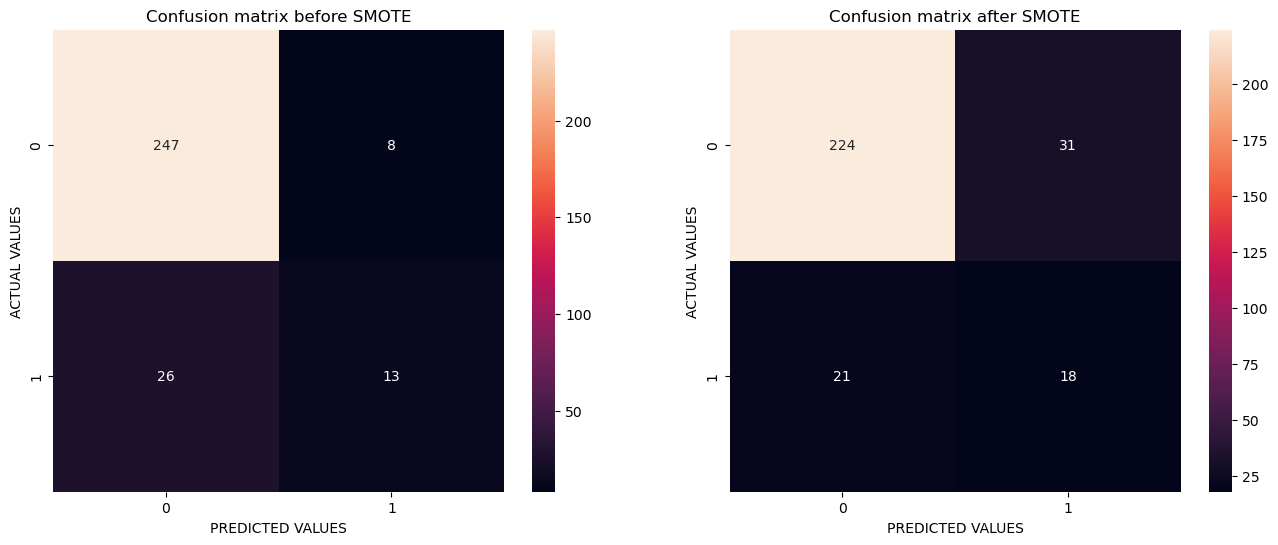

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True,fmt = "d", ax = ax1)
ax1.set_title('Confusion matrix before SMOTE')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test, lr_pred2),annot=True,fmt = "d", ax = ax2)
ax2.set_title('Confusion matrix after SMOTE')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()

### 2.Decision trees

In [39]:
from sklearn.tree import DecisionTreeClassifier 
print('----------------------------Before SMOTE----------------------------')
model_dt = DecisionTreeClassifier(max_depth=9, max_features='sqrt', max_leaf_nodes=9)
model_dt.fit(X_train, y_train)
predict_test = model_dt.predict(X_test)
print(classification_report(y_test, predict_test))
print('----------------------------After SMOTE----------------------------')
model2_dt = DecisionTreeClassifier (max_depth=9, max_features='log2', max_leaf_nodes=9)
model2_dt.fit(X_train_sm, y_train_sm)
predict_test2 = model2_dt.predict(X_test)
print(classification_report(y_test, predict_test2))

----------------------------Before SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       255
           1       0.39      0.23      0.29        39

    accuracy                           0.85       294
   macro avg       0.64      0.59      0.60       294
weighted avg       0.82      0.85      0.83       294

----------------------------After SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       255
           1       0.20      0.54      0.30        39

    accuracy                           0.66       294
   macro avg       0.55      0.61      0.54       294
weighted avg       0.81      0.66      0.71       294



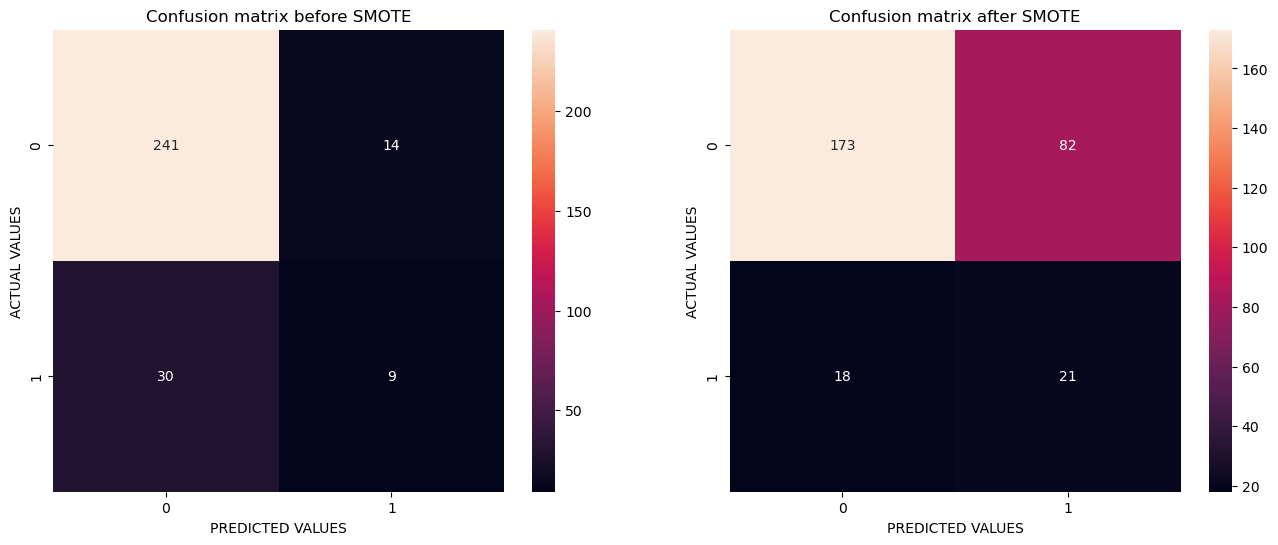

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(confusion_matrix(y_test, predict_test), annot=True,fmt = "d", ax = ax1)
ax1.set_title('Confusion matrix before SMOTE')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test, predict_test2),annot=True,fmt = "d", ax = ax2)
ax2.set_title('Confusion matrix after SMOTE')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()

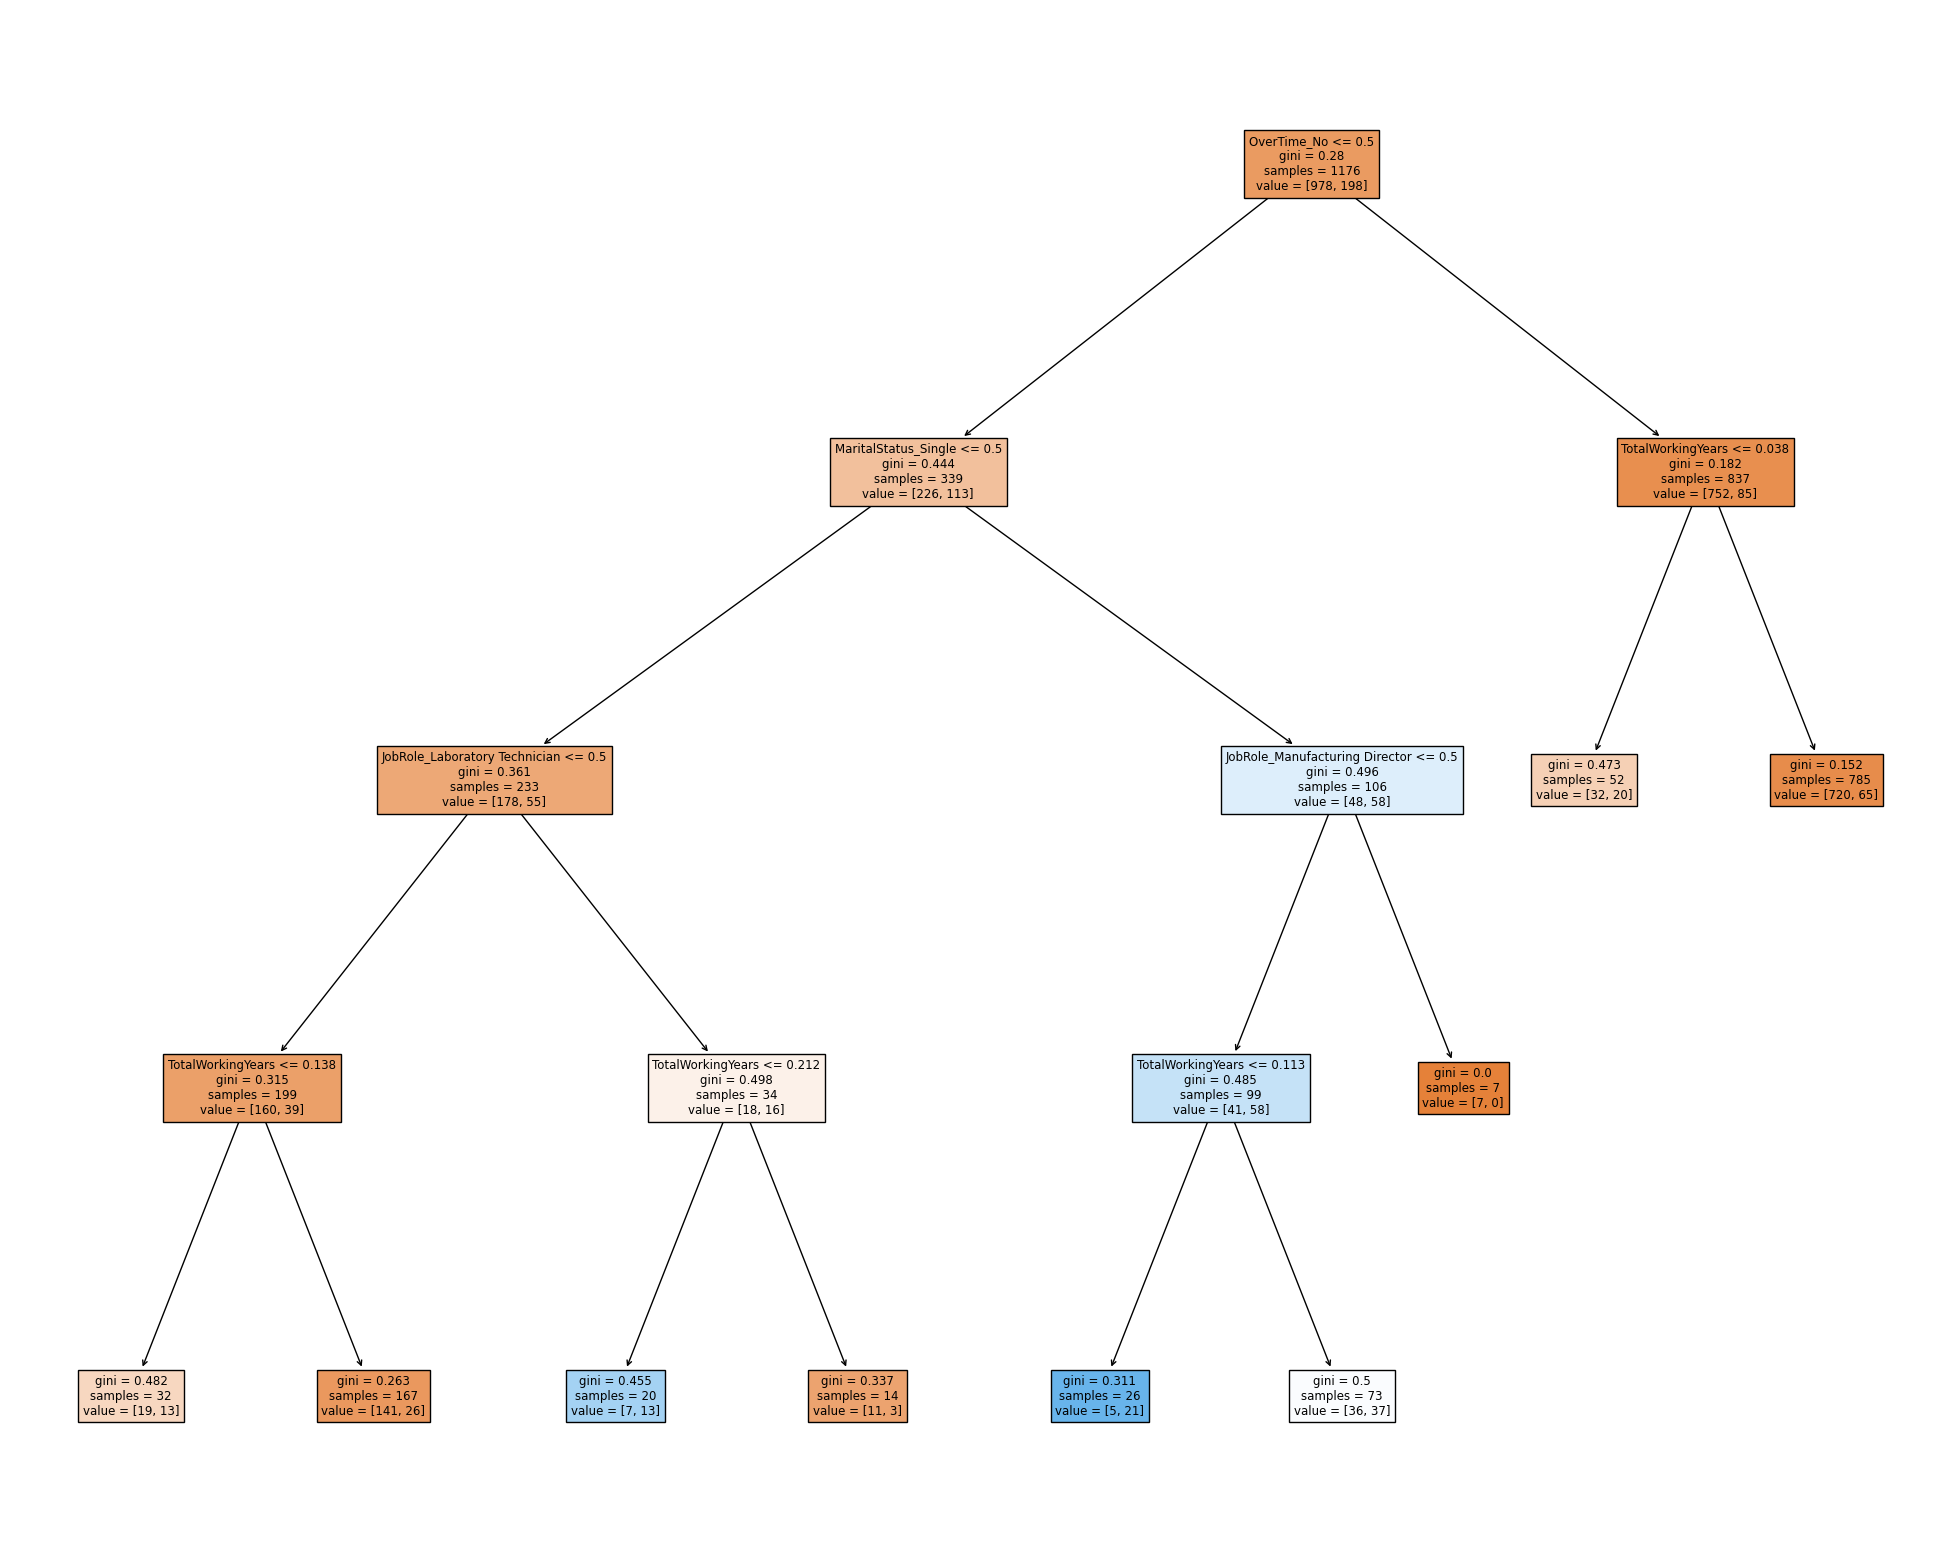

In [41]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt,feature_names=X_train.columns,filled=True)

### 3. Random Forest

In [42]:
print('----------------------------Before SMOTE----------------------------')
model_rf = RandomForestClassifier(max_depth=9, max_features='sqrt', max_leaf_nodes=9,
                       n_estimators=15)
model_rf.fit(X_train, y_train)
prediction_test = model_rf.predict(X_test)
print(classification_report(y_test, prediction_test))
print('----------------------------After SMOTE----------------------------')
model2_rf = RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=200)
model2_rf.fit(X_train_sm, y_train_sm)
prediction_test2 = model2_rf.predict(X_test)
print(classification_report(y_test, prediction_test2))

----------------------------Before SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.67      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.77      0.52      0.51       294
weighted avg       0.85      0.87      0.82       294

----------------------------After SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       255
           1       0.35      0.41      0.38        39

    accuracy                           0.82       294
   macro avg       0.63      0.65      0.64       294
weighted avg       0.83      0.82      0.83       294



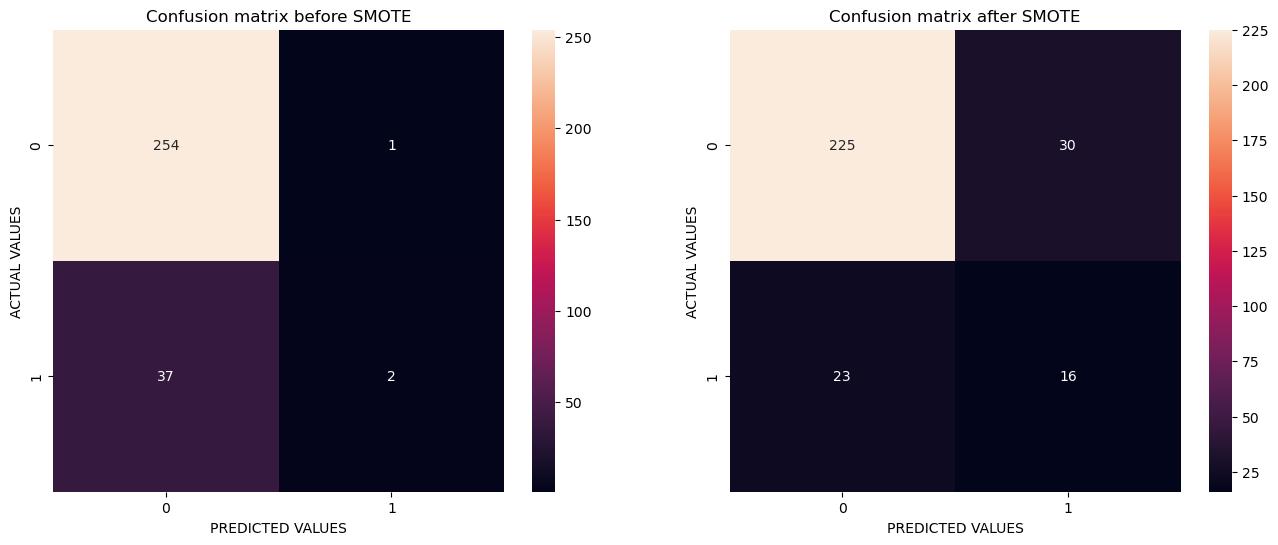

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True,fmt = "d", ax = ax1)
ax1.set_title('Confusion matrix before SMOTE')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test, prediction_test2),annot=True,fmt = "d", ax = ax2)
ax2.set_title('Confusion matrix after SMOTE')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()

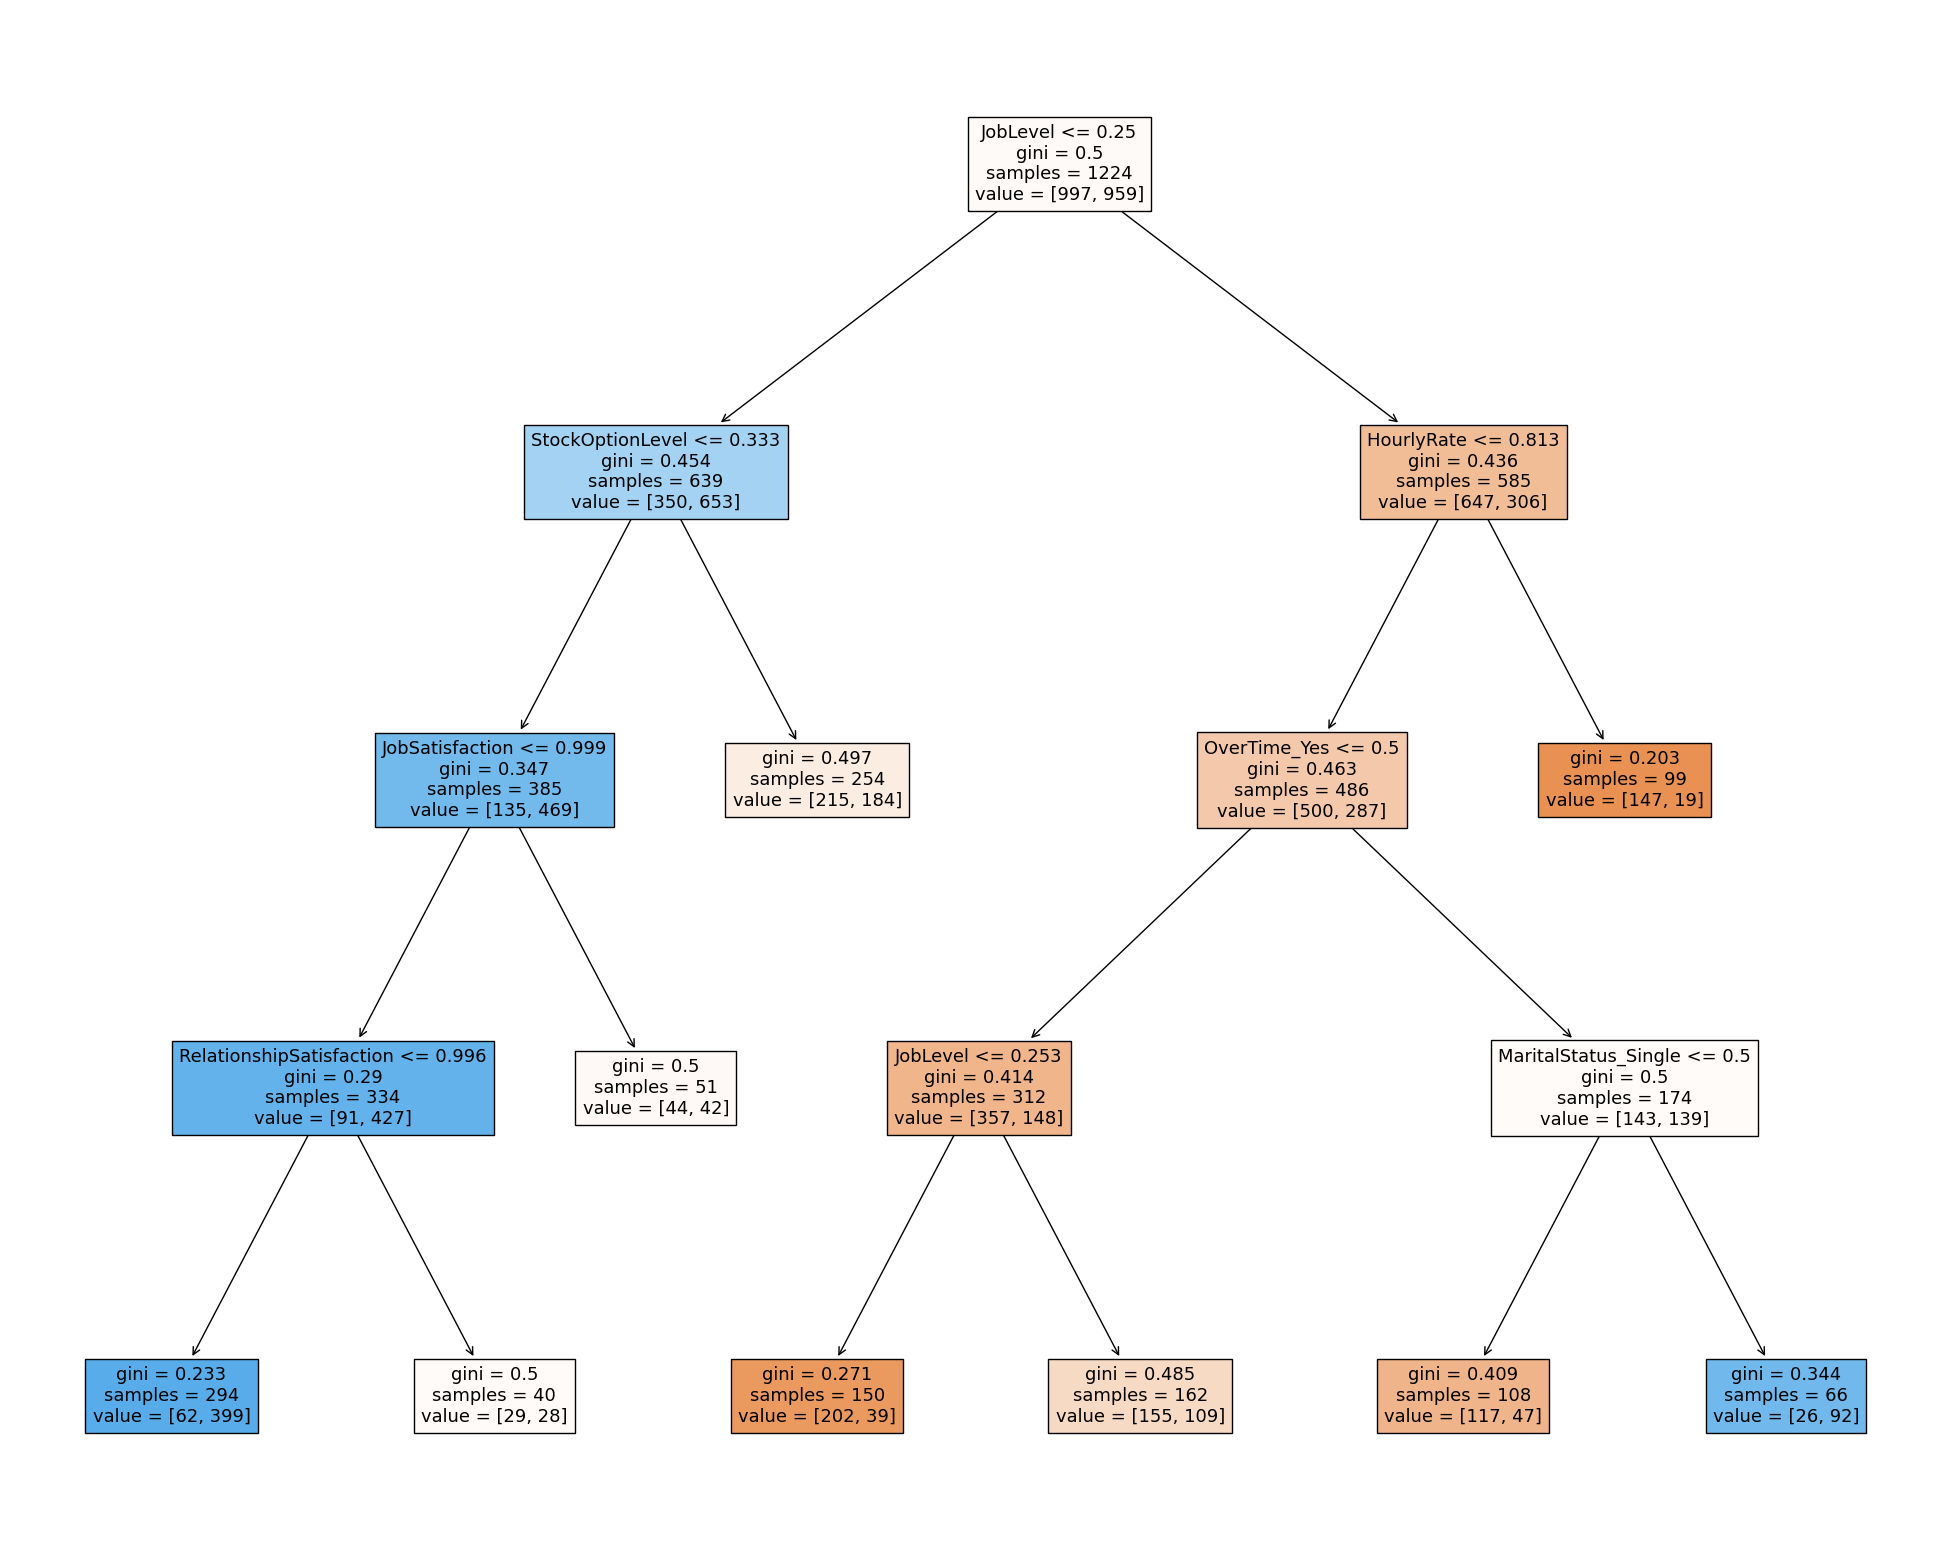

In [44]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(model2_rf.estimators_[1],feature_names=X_train.columns,filled=True)

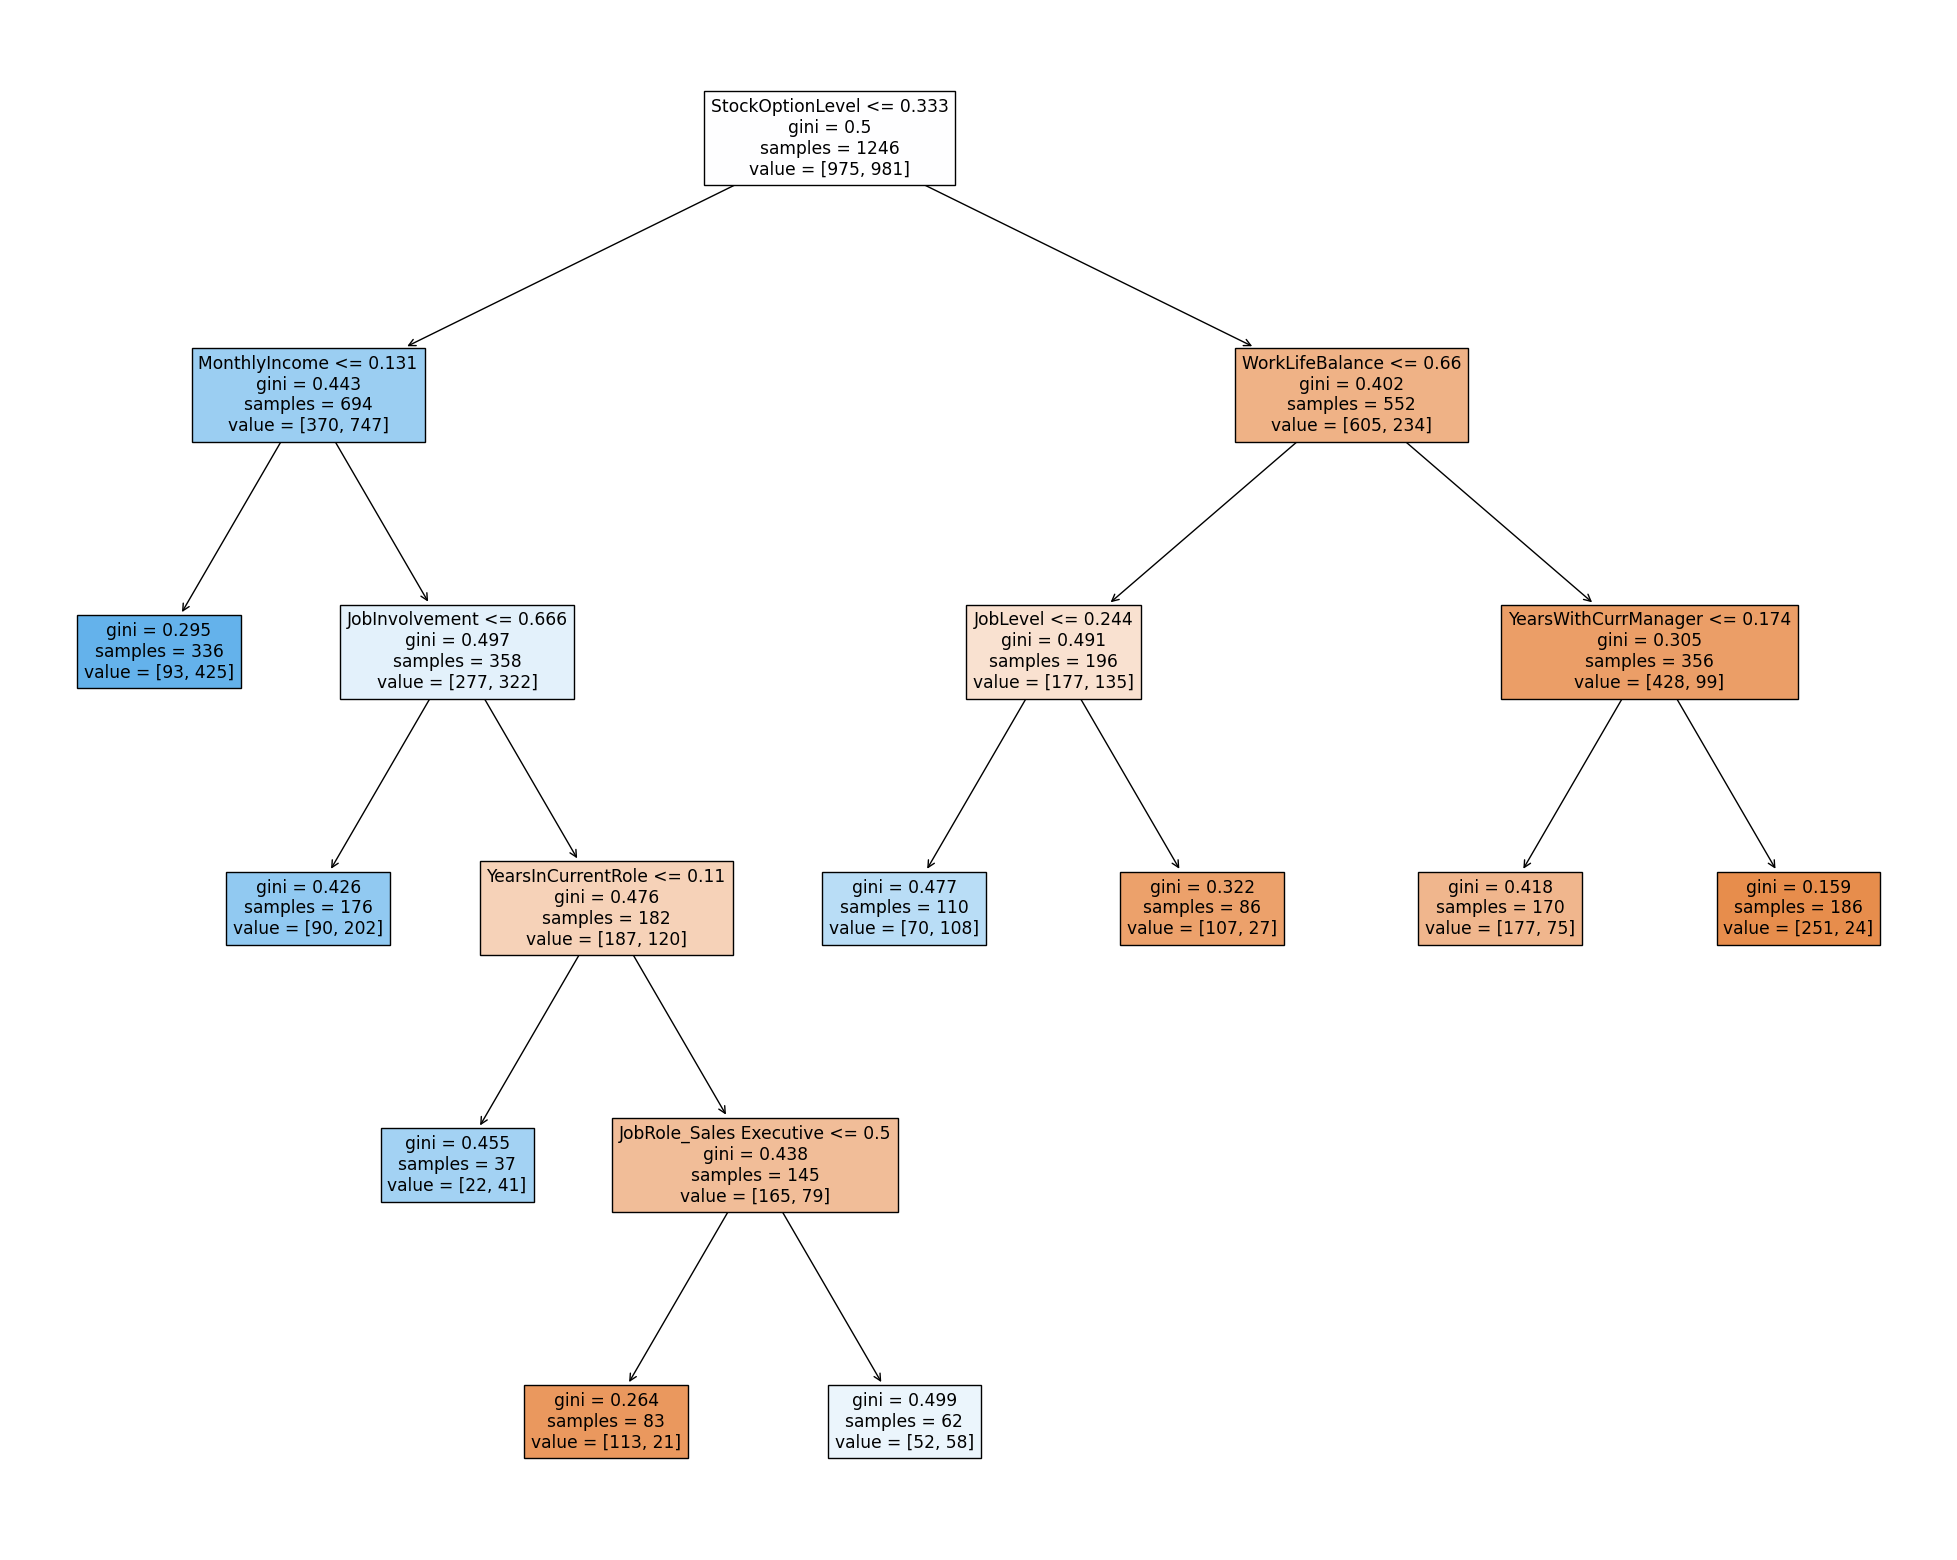

In [45]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(model2_rf.estimators_[2],feature_names=X_train.columns,filled=True)

### 4.K-Nearest Neighbours

In [46]:
from sklearn.neighbors import KNeighborsClassifier
print('----------------------------Before SMOTE----------------------------')
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test, knn_pred))

print('----------------------------After SMOTE----------------------------')
knn2 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn2.fit(X_train_sm, y_train_sm)
knn2_pred = knn2.predict(X_test)
print(classification_report(y_test, knn2_pred))

----------------------------Before SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.78      0.18      0.29        39

    accuracy                           0.88       294
   macro avg       0.83      0.59      0.61       294
weighted avg       0.87      0.88      0.85       294

----------------------------After SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       255
           1       0.18      0.41      0.25        39

    accuracy                           0.67       294
   macro avg       0.53      0.56      0.52       294
weighted avg       0.79      0.67      0.72       294



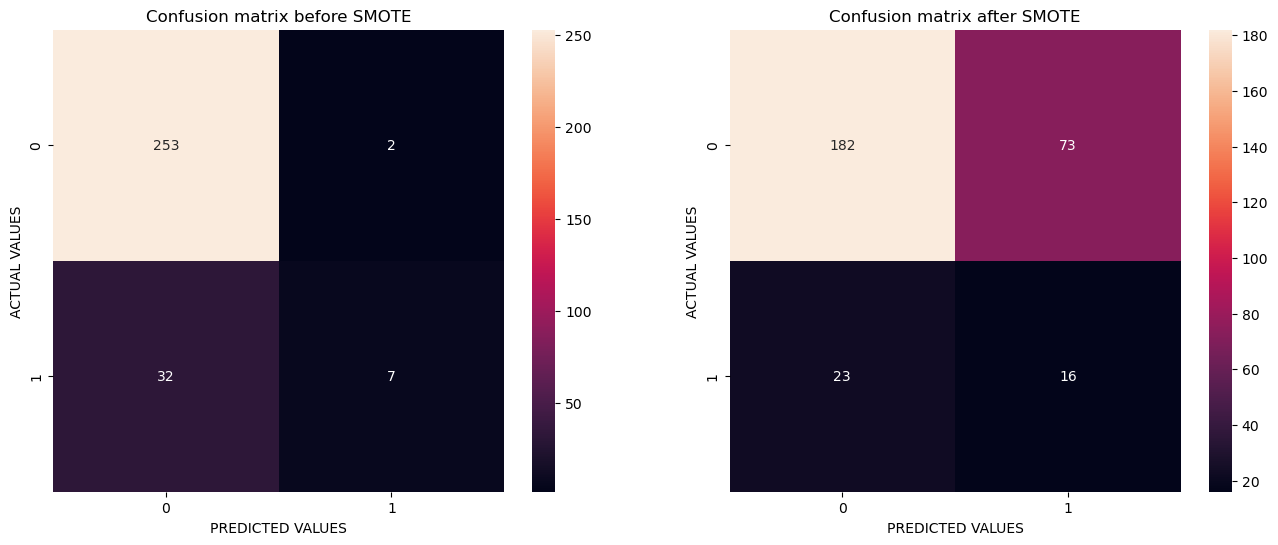

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(confusion_matrix(y_test,knn_pred), annot=True,fmt = "d", ax = ax1)
ax1.set_title('Confusion matrix before SMOTE')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test,knn2_pred),annot=True,fmt = "d", ax = ax2)
ax2.set_title('Confusion matrix after SMOTE')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()

### 5.Gradient Boosting

In [48]:
print('----------------------------Before SMOTE----------------------------')
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print(classification_report(y_test, gb_pred))

print('----------------------------After SMOTE----------------------------')
gb2 = GradientBoostingClassifier()
gb2.fit(X_train_sm, y_train_sm)
gb2_pred = gb2.predict(X_test)
print(classification_report(y_test, gb2_pred))

----------------------------Before SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       255
           1       0.44      0.21      0.28        39

    accuracy                           0.86       294
   macro avg       0.67      0.58      0.60       294
weighted avg       0.83      0.86      0.84       294

----------------------------After SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       255
           1       0.60      0.31      0.41        39

    accuracy                           0.88       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.86      0.88      0.86       294



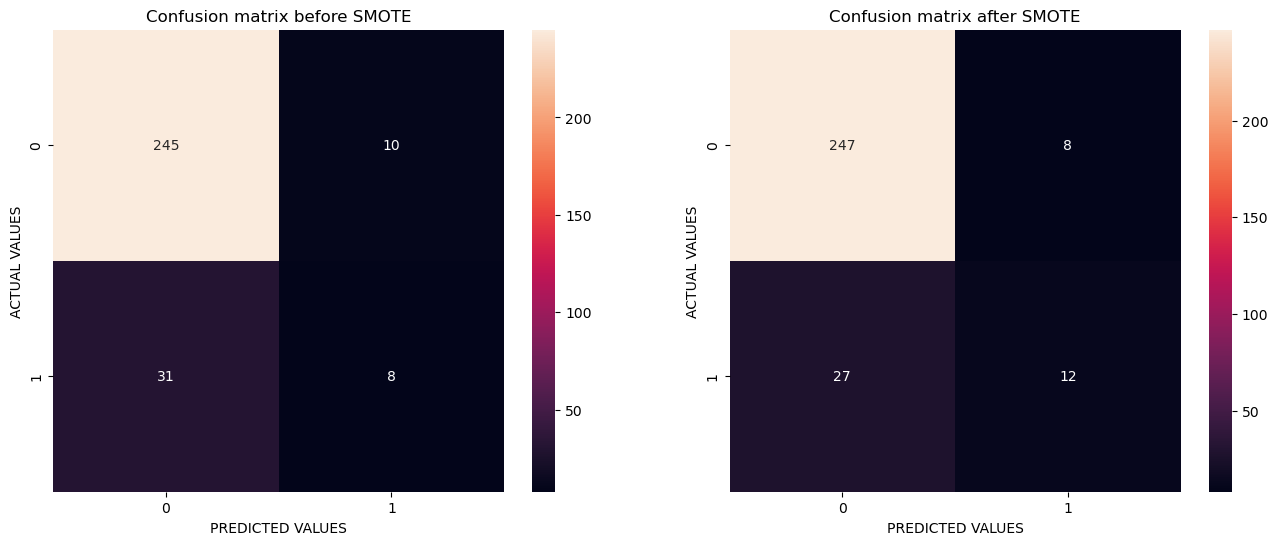

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(confusion_matrix(y_test,gb_pred), annot=True,fmt = "d", ax = ax1)
ax1.set_title('Confusion matrix before SMOTE')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test,gb2_pred),annot=True,fmt = "d", ax = ax2)
ax2.set_title('Confusion matrix after SMOTE')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()

### 6. XGBoost

In [50]:
print('---------------------------Before SMOTE----------------------------')
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))
print('----------------------------After SMOTE----------------------------')
xgb2 = XGBClassifier()
xgb2.fit(X_train_sm, y_train_sm)
xgb2_pred = xgb2.predict(X_test)
print("XGB Classifier", accuracy_score(y_test, xgb2_pred))
print(classification_report(y_test, xgb2_pred))

---------------------------Before SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.55      0.28      0.37        39

    accuracy                           0.87       294
   macro avg       0.72      0.62      0.65       294
weighted avg       0.85      0.87      0.86       294

----------------------------After SMOTE----------------------------
XGB Classifier 0.8673469387755102
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.50      0.28      0.36        39

    accuracy                           0.87       294
   macro avg       0.70      0.62      0.64       294
weighted avg       0.84      0.87      0.85       294



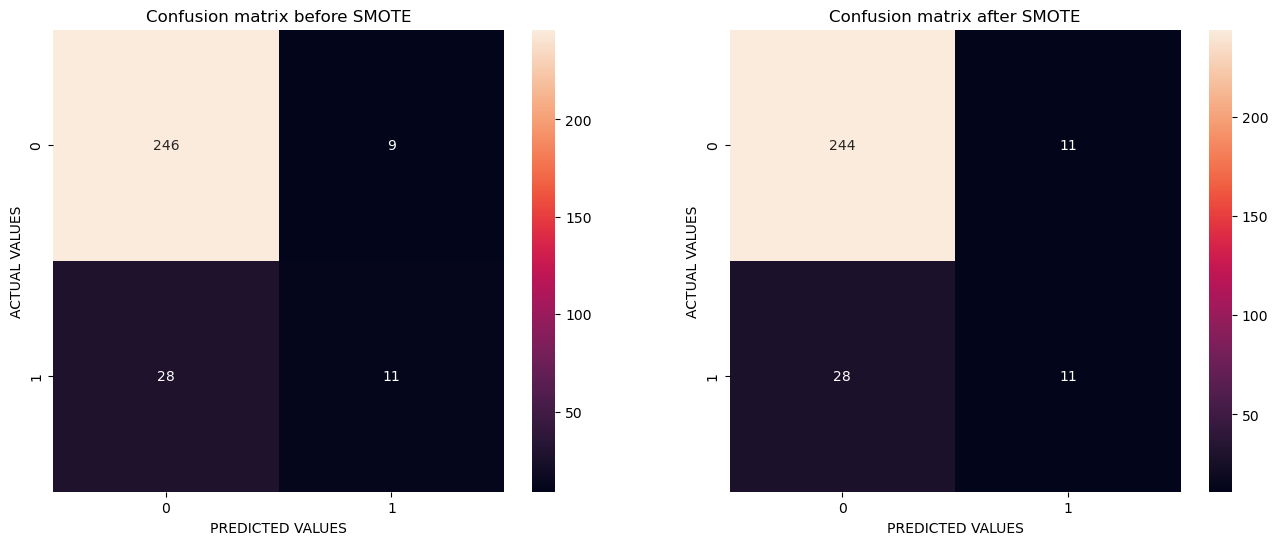

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(confusion_matrix(y_test,xgb_pred), annot=True,fmt = "d", ax = ax1)
ax1.set_title('Confusion matrix before SMOTE')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test,xgb2_pred),annot=True,fmt = "d", ax = ax2)
ax2.set_title('Confusion matrix after SMOTE')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()

### 7. LDA

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
print('---------------------------Before SMOTE----------------------------')
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
print(classification_report(y_test, lda_pred))
print('----------------------------After SMOTE----------------------------')
lda2 = LinearDiscriminantAnalysis()
lda2.fit(X_train_sm, y_train_sm)
lda2_pred = lda2.predict(X_test)
print("LDA Classifier", accuracy_score(y_test, lda2_pred))
print(classification_report(y_test, lda2_pred))

---------------------------Before SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       255
           1       0.56      0.36      0.44        39

    accuracy                           0.88       294
   macro avg       0.73      0.66      0.68       294
weighted avg       0.86      0.88      0.87       294

----------------------------After SMOTE----------------------------
LDA Classifier 0.8231292517006803
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       255
           1       0.36      0.41      0.38        39

    accuracy                           0.82       294
   macro avg       0.63      0.65      0.64       294
weighted avg       0.83      0.82      0.83       294



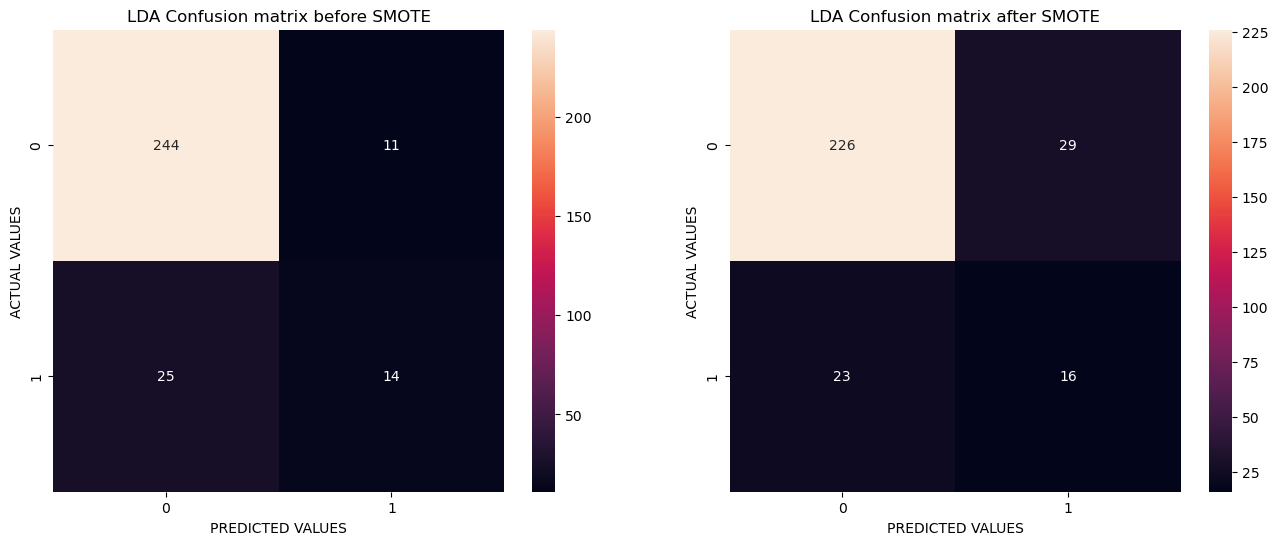

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(confusion_matrix(y_test,lda_pred), annot=True,fmt = "d", ax = ax1)
ax1.set_title('LDA Confusion matrix before SMOTE')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test,lda2_pred),annot=True,fmt = "d", ax = ax2)
ax2.set_title('LDA Confusion matrix after SMOTE')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()

### 8.QDA

In [54]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
print('---------------------------Before SMOTE----------------------------')
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
print(classification_report(y_test, qda_pred))
print('----------------------------After SMOTE----------------------------')
qda2 = QuadraticDiscriminantAnalysis()
qda2.fit(X_train_sm, y_train_sm)
qda2_pred = qda2.predict(X_test)
print("QDA Classifier", accuracy_score(y_test, qda2_pred))
print(classification_report(y_test, qda2_pred))

---------------------------Before SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.91      0.28      0.43       255
           1       0.15      0.82      0.25        39

    accuracy                           0.35       294
   macro avg       0.53      0.55      0.34       294
weighted avg       0.81      0.35      0.41       294

----------------------------After SMOTE----------------------------
QDA Classifier 0.8673469387755102
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



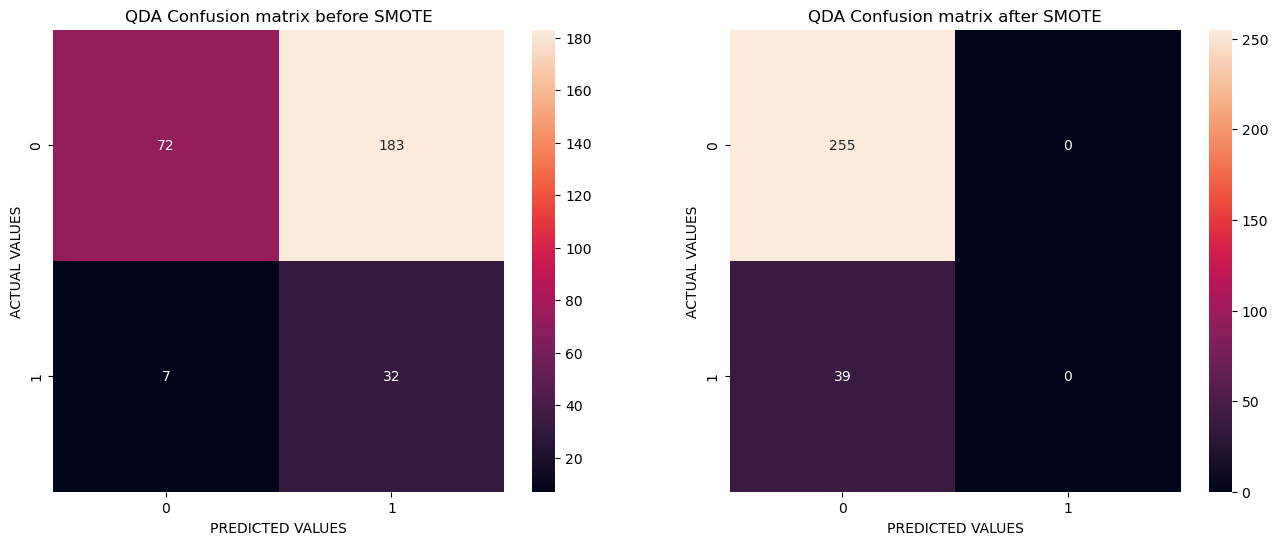

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(confusion_matrix(y_test,qda_pred), annot=True,fmt = "d", ax = ax1)
ax1.set_title('QDA Confusion matrix before SMOTE')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test,qda2_pred),annot=True,fmt = "d", ax = ax2)
ax2.set_title('QDA Confusion matrix after SMOTE')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()

### 9.AdaBoost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
print('---------------------------Before SMOTE----------------------------')
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print(classification_report(y_test, ada_pred))
print('----------------------------After SMOTE----------------------------')
ada2 = AdaBoostClassifier(n_estimators=100, random_state=0)
ada2.fit(X_train_sm, y_train_sm)
ada2_pred = ada2.predict(X_test)
print("AdaBoost Classifier", accuracy_score(y_test, ada2_pred))
print(classification_report(y_test, ada2_pred))

---------------------------Before SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.48      0.28      0.35        39

    accuracy                           0.86       294
   macro avg       0.69      0.62      0.64       294
weighted avg       0.84      0.86      0.85       294

----------------------------After SMOTE----------------------------
AdaBoost Classifier 0.8367346938775511
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       255
           1       0.41      0.54      0.47        39

    accuracy                           0.84       294
   macro avg       0.67      0.71      0.69       294
weighted avg       0.86      0.84      0.85       294



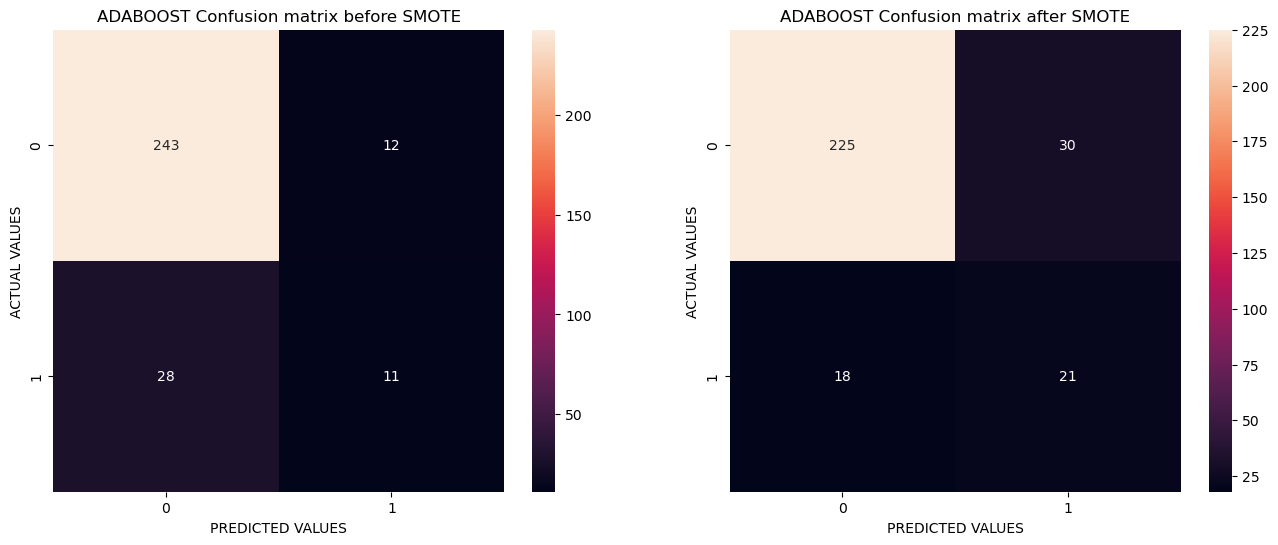

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(confusion_matrix(y_test,ada_pred), annot=True,fmt = "d", ax = ax1)
ax1.set_title('ADABOOST Confusion matrix before SMOTE')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test,ada2_pred),annot=True,fmt = "d", ax = ax2)
ax2.set_title('ADABOOST Confusion matrix after SMOTE')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()

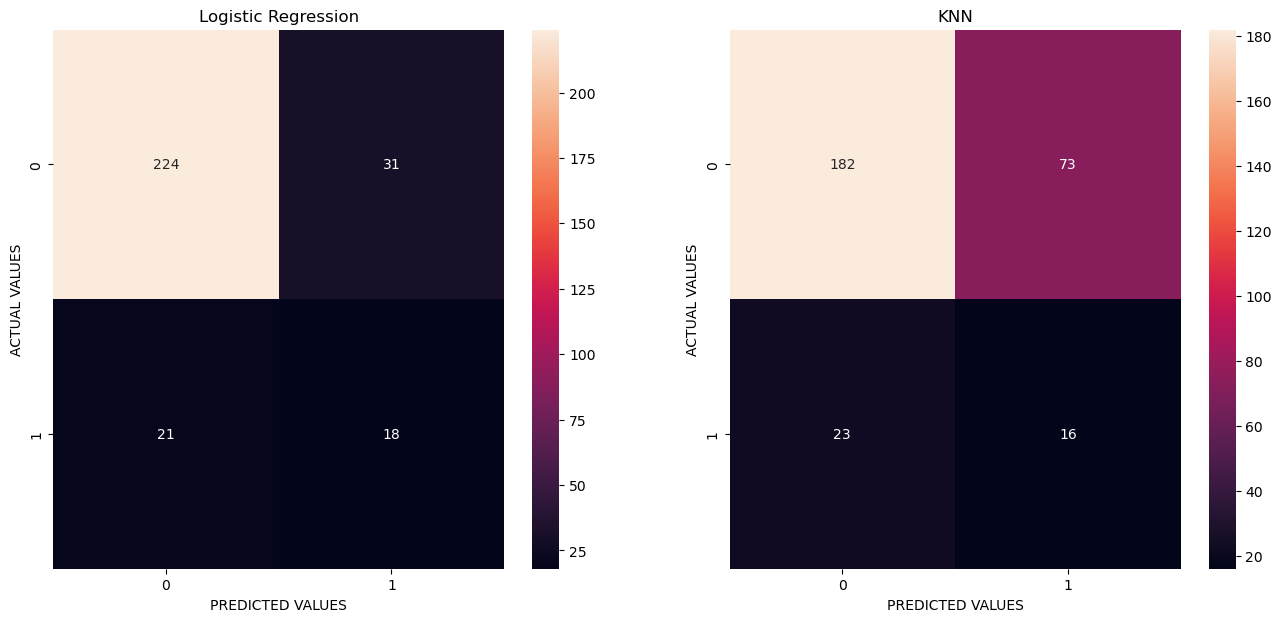

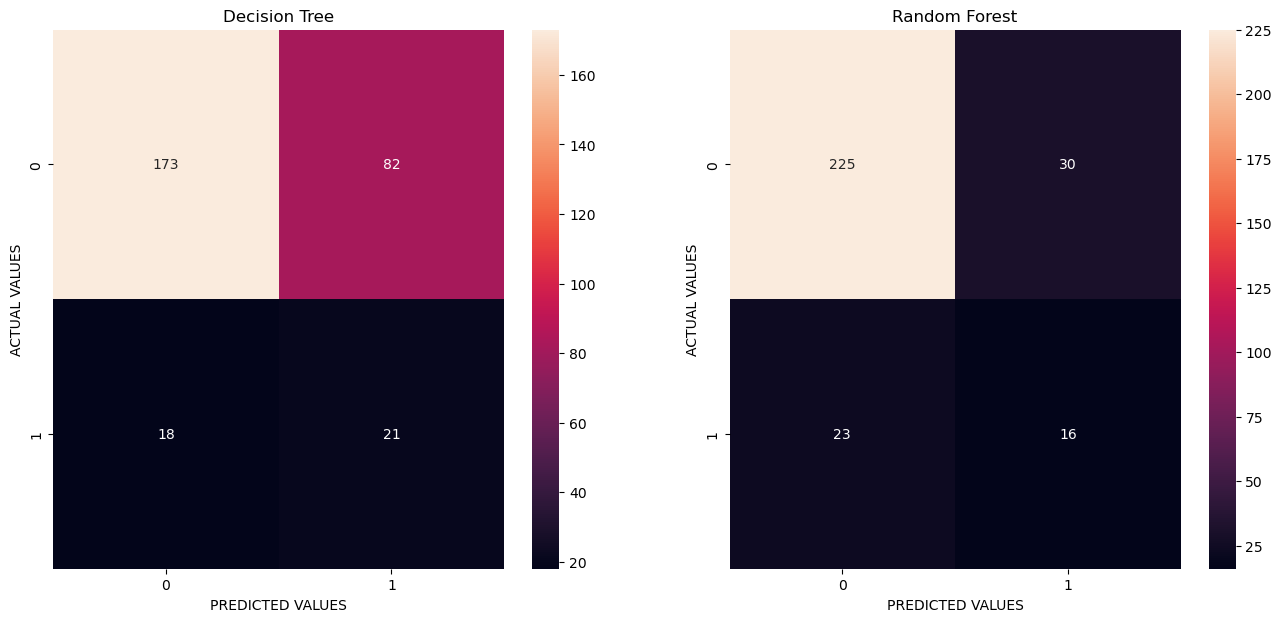

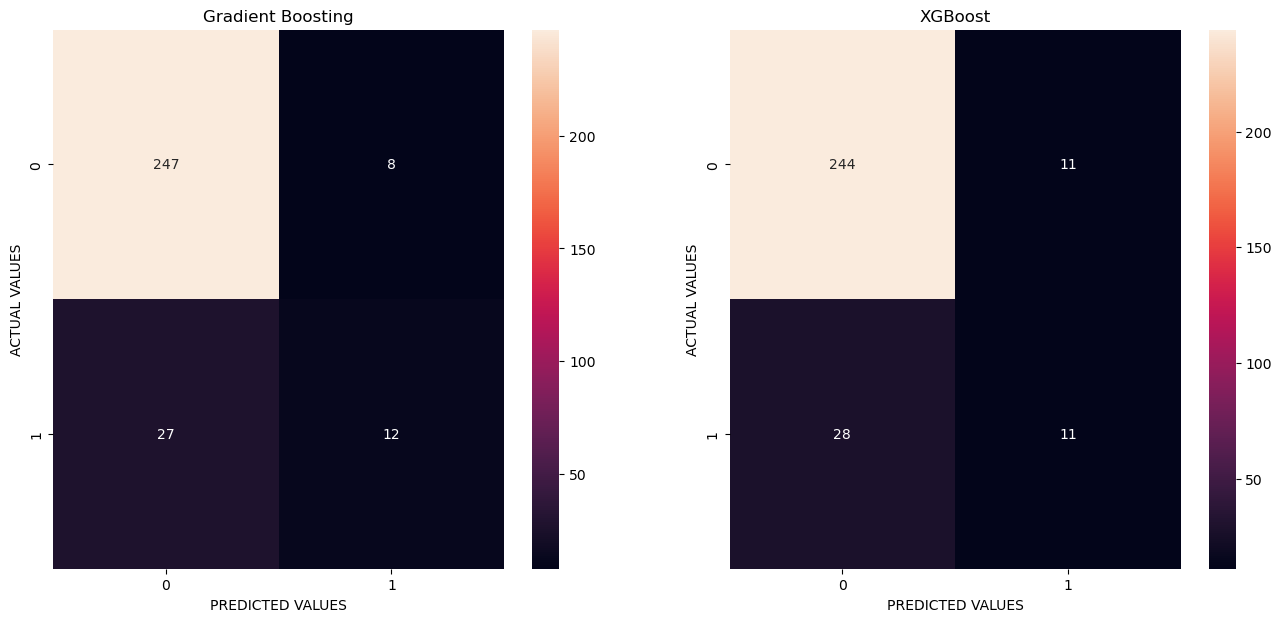

In [58]:
## Comparing the classifiers after SMOTE

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
sns.heatmap(confusion_matrix(y_test, lr_pred2), annot=True,fmt = "d", ax = ax1)
ax1.set_title('Logistic Regression')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test,knn2_pred),annot=True,fmt = "d", ax = ax2)
ax2.set_title('KNN')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
sns.heatmap(confusion_matrix(y_test, predict_test2),annot=True,fmt = "d", ax = ax1)
ax1.set_title('Decision Tree')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test, prediction_test2),annot=True,fmt = "d", ax = ax2)
ax2.set_title('Random Forest')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
sns.heatmap(confusion_matrix(y_test,gb2_pred),annot=True,fmt = "d", ax = ax1)
ax1.set_title('Gradient Boosting')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test,xgb2_pred),annot=True,fmt = "d", ax = ax2)
ax2.set_title('XGBoost')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()

## Voting Classifier on Logistic, Random Forest, Gradient Boost and XGBoost

In [59]:
from sklearn.svm import SVC
print('---------------------------Before SMOTE----------------------------')
svc = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(classification_report(y_test, svc_pred))
print('----------------------------After SMOTE----------------------------')
svc2 = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
svc2.fit(X_train_sm, y_train_sm)
svc2_pred = svc2.predict(X_test)
print(classification_report(y_test, svc2_pred))

---------------------------Before SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294

----------------------------After SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       255
           1       0.37      0.46      0.41        39

    accuracy                           0.82       294
   macro avg       0.64      0.67      0.65       294
weighted avg       0.84      0.82      0.83       294



In [60]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,n_estimators=200)
clf4 = XGBClassifier()
clf5 = DecisionTreeClassifier (max_depth=9, max_features='log2', max_leaf_nodes=9)
clf6 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
clf7 = LinearDiscriminantAnalysis()
clf8 = AdaBoostClassifier(n_estimators=100, random_state=0)

print('---------------------------Before SMOTE----------------------------')
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('rf', clf3), ('xgb', clf4), 
                                     ('dt',clf5), ('knn',clf6), ('lda',clf7),('ada',clf8)], voting='soft')
eclf1.fit(X_train, y_train)
predictions1 = eclf1.predict(X_test)
print(classification_report(y_test, predictions1))

print('----------------------------After SMOTE----------------------------')
eclf2 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('rf', clf3), ('xgb', clf4),
                                     ('dt',clf5), ('knn',clf6), ('lda',clf7),('ada',clf8)], voting='soft')
eclf2.fit(X_train_sm, y_train_sm)
predictions2 = eclf2.predict(X_test)
print(classification_report(y_test, predictions2))

---------------------------Before SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       255
           1       0.86      0.15      0.26        39

    accuracy                           0.88       294
   macro avg       0.87      0.57      0.60       294
weighted avg       0.88      0.88      0.85       294

----------------------------After SMOTE----------------------------
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       255
           1       0.50      0.44      0.47        39

    accuracy                           0.87       294
   macro avg       0.71      0.68      0.70       294
weighted avg       0.86      0.87      0.86       294



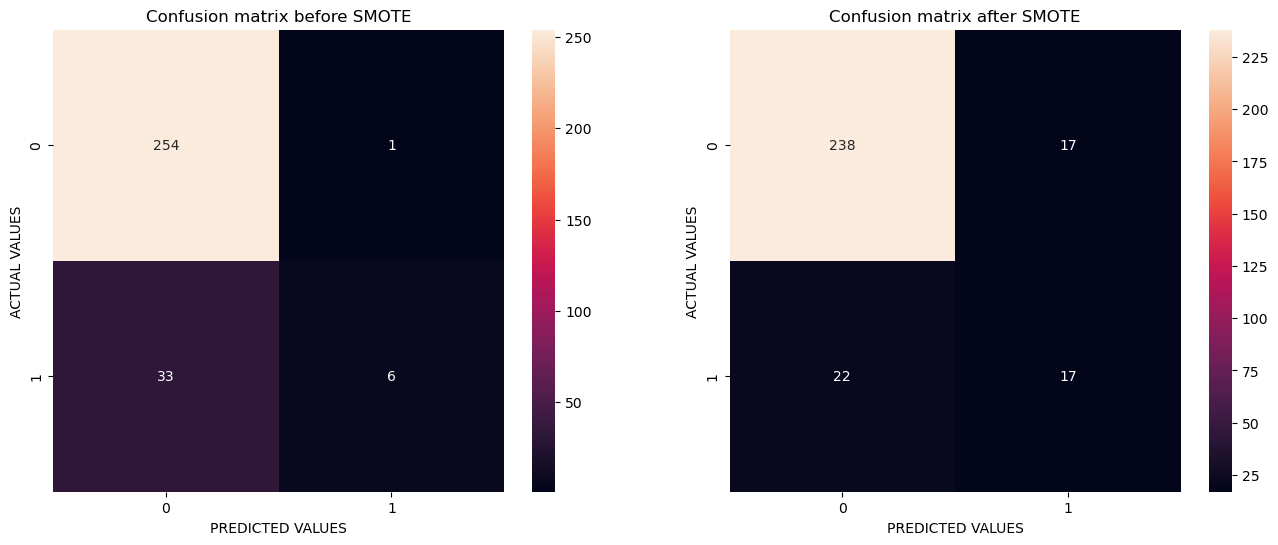

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(confusion_matrix(y_test,predictions1), annot=True,fmt = "d", ax = ax1)
ax1.set_title('Confusion matrix before SMOTE')
ax1.set_xlabel('PREDICTED VALUES')
ax1.set_ylabel('ACTUAL VALUES')

sns.heatmap(confusion_matrix(y_test,predictions2),annot=True,fmt = "d", ax = ax2)
ax2.set_title('Confusion matrix after SMOTE')
ax2.set_xlabel('PREDICTED VALUES')
ax2.set_ylabel('ACTUAL VALUES')
plt.show()

In [62]:
## Before SMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,recall_score,precision_score
b1=f1_score(y_test,lr_pred)
b2=f1_score(y_test,lda_pred)
b3=f1_score(y_test,knn_pred)
b4=f1_score(y_test,predict_test)
b5=f1_score(y_test,prediction_test)
b6=f1_score(y_test,ada_pred)
b7=f1_score(y_test,gb_pred)
b8=f1_score(y_test,xgb_pred)
F2=[b1,b2,b3,b4,b5,b6,b7,b8]
classifiers=['Logistic Regression','LDA','KNN','Decision tree','Random Forest','Ada Boost','Gradient Boosting','XGBoost']
print('------------Before SMOTE---------------')
f1=pd.DataFrame({'Classifier':classifiers,'F1-Score':F2})
f1

------------Before SMOTE---------------


Classifier  F1-Score
0  Logistic Regression  0.433333
1                  LDA  0.437500
2                  KNN  0.291667
3        Decision tree  0.290323
4        Random Forest  0.095238
5            Ada Boost  0.354839
6    Gradient Boosting  0.280702
7              XGBoost  0.372881

In [63]:
a1=f1_score(y_test,lr_pred2)
a2=f1_score(y_test,lda2_pred)
a3=f1_score(y_test,knn2_pred)
a4=f1_score(y_test,predict_test2)
a5=f1_score(y_test,prediction_test2)
a6=f1_score(y_test,ada2_pred)
a7=f1_score(y_test,gb2_pred)
a8=f1_score(y_test,xgb2_pred)
a9=f1_score(y_test,predictions2)
F1=[a1,a2,a3,a4,a5,a6,a7,a8,a9]

b1=recall_score(y_test,lr_pred2)
b2=recall_score(y_test,lda2_pred)
b3=recall_score(y_test,knn2_pred)
b4=recall_score(y_test,predict_test2)
b5=recall_score(y_test,prediction_test2)
b6=recall_score(y_test,ada2_pred)
b7=recall_score(y_test,gb2_pred)
b8=recall_score(y_test,xgb2_pred)
b9=recall_score(y_test,predictions2)
F2=[b1,b2,b3,b4,b5,b6,b7,b8,b9]

c1=accuracy_score(y_test,lr_pred2)
c2=accuracy_score(y_test,lda2_pred)
c3=accuracy_score(y_test,knn2_pred)
c4=accuracy_score(y_test,predict_test2)
c5=accuracy_score(y_test,prediction_test2)
c6=accuracy_score(y_test,ada2_pred)
c7=accuracy_score(y_test,gb2_pred)
c8=accuracy_score(y_test,xgb2_pred)
c9=accuracy_score(y_test,predictions2)
F3=[c1,c2,c3,c4,c5,c6,c7,c8,c9]

d1=precision_score(y_test,lr_pred2)
d2=precision_score(y_test,lda2_pred)
d3=precision_score(y_test,knn2_pred)
d4=precision_score(y_test,predict_test2)
d5=precision_score(y_test,prediction_test2)
d6=precision_score(y_test,ada2_pred)
d7=precision_score(y_test,gb2_pred)
d8=precision_score(y_test,xgb2_pred)
d9=precision_score(y_test,predictions2)
F4=[d1,d2,d3,d4,d5,d6,d7,d8,d9]

classifiers=['Logistic Regression','LDA','KNN','Decision tree','Random Forest','Ada Boost','Gradient Boosting','XGBoost', 'Voting Classifier']
f2=pd.DataFrame({'Classifier':classifiers,'F1-Score':F1,'Accuracy':F3,'Recall':F2,'Precsion':F4})
print('------------After SMOTE---------------')
f2

------------After SMOTE---------------


Classifier  F1-Score  Accuracy    Recall  Precsion
0  Logistic Regression  0.409091  0.823129  0.461538  0.367347
1                  LDA  0.380952  0.823129  0.410256  0.355556
2                  KNN  0.250000  0.673469  0.410256  0.179775
3        Decision tree  0.295775  0.659864  0.538462  0.203883
4        Random Forest  0.376471  0.819728  0.410256  0.347826
5            Ada Boost  0.466667  0.836735  0.538462  0.411765
6    Gradient Boosting  0.406780  0.880952  0.307692  0.600000
7              XGBoost  0.360656  0.867347  0.282051  0.500000
8    Voting Classifier  0.465753  0.867347  0.435897  0.500000